<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outils-projet" data-toc-modified-id="Outils-projet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outils projet</a></span></li><li><span><a href="#La-lecture-de-l'échantillon-initial" data-toc-modified-id="La-lecture-de-l'échantillon-initial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La lecture de l'échantillon initial</a></span></li><li><span><a href="#Distribution-des-modalités" data-toc-modified-id="Distribution-des-modalités-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Distribution des modalités</a></span></li><li><span><a href="#StandardScaler" data-toc-modified-id="StandardScaler-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>StandardScaler</a></span></li><li><span><a href="#Distributions-des-variables" data-toc-modified-id="Distributions-des-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distributions des variables</a></span></li><li><span><a href="#La-separation-des-données-pour-l'apprentissage" data-toc-modified-id="La-separation-des-données-pour-l'apprentissage-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>La separation des données pour l'apprentissage</a></span></li><li><span><a href="#Le-déclaration-des-classifieurs" data-toc-modified-id="Le-déclaration-des-classifieurs-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Le déclaration des classifieurs</a></span></li><li><span><a href="#Le-choix-des-classifieurs" data-toc-modified-id="Le-choix-des-classifieurs-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Le choix des classifieurs</a></span></li></ul></div>

>> **Vous trouvez les données et leur description :**<br>
>> https://www.kaggle.com/andrewmvd/fetal-health-classification<br>


L'ensemble de données contient **2126** enregistrements de caractéristiques extraites d'examens de **cardiotocogramme**, qui ont ensuite été classés par trois obstétriciens experts.<br>

Classer la santé d'un foetus comme :<br>
>> - normale, 
>> - suspecte 
>> - pathologique

In [1]:
import pandas as pd              
import seaborn as sns  
import os, warnings

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


# Outils projet

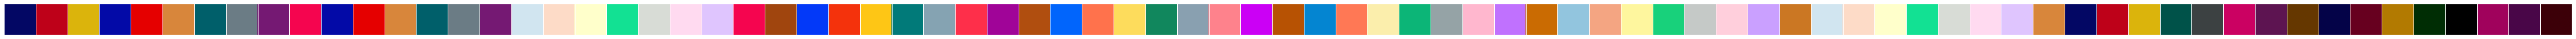

In [2]:
palette = [ "#030764", "#be0119", "#dbb40c",
            "#030aa7", "#e50000", "#d8863b", 
            "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
sns.palplot(sns.color_palette(palette))

In [3]:
from datetime import datetime as dt

repertoireRacine  = '.'
nomProjet         = 'ROC_Présentation_Fetal_Health'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
#                              fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             fichier+".png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

In [46]:
from matplotlib.colors import ListedColormap
from itertools import cycle
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                            precision_score, recall_score, f1_score, fbeta_score, jaccard_score, \
                            precision_recall_curve, average_precision_score, balanced_accuracy_score, \
                            plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, zero_one_loss
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, \
                                    RepeatedStratifiedKFold, LeavePOut, LeaveOneGroupOut, \
                                    LeavePGroupsOut, ShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit, GridSearchCV

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

from sklearn.neighbors  import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble   import IsolationForest
from sklearn.svm        import OneClassSVM

In [5]:
from sklearn.preprocessing import LabelEncoder


# La lecture de l'échantillon initial


<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonInitial.png" width="800">

In [6]:
donnees = pd.read_csv('../donnees/Fetal Health/fetal_health.csv', 
#                            index_col='id',
                           skiprows=5)
donnees.fetal_health = donnees.fetal_health.astype('int8')
donnees.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1


In [7]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
donnees.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [9]:
label_dict = {1:'normale',2:'suspecte',3:'pathologique'}
label_dict_inv = {'normale':1,'suspecte':2,'pathologique':3}
donnees.fetal_health = donnees.fetal_health.apply(lambda x: label_dict[x])

# Distribution des modalités

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

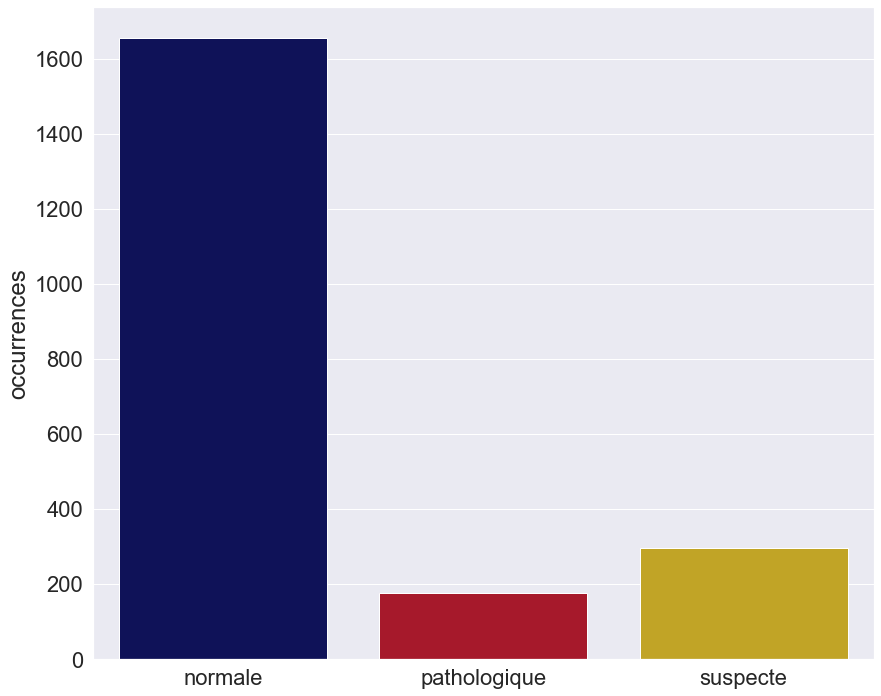

In [10]:
plt.figure(figsize=(14,12))

graph = sns.countplot(x='fetal_health',
                      data=donnees.sort_values('fetal_health'), 
                      palette={n:palette[i] for i,n in enumerate(donnees.fetal_health.sort_values().unique())});

graph.set_ylabel('occurrences');
graph.set_xlabel('');


for i,nb in enumerate(donnees.sort_values('fetal_health').groupby('fetal_health').fetal_movement.count()):
        graph.text(
                i,
                100,
                nb,
                color='black',
                rotation='horizontal',
                size='large',
                fontsize='x-large',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
        
sauvegarderImage("Les enregistrements par diagnostique") 

# StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
modelStd = StandardScaler()
donnees[donnees.drop(columns='fetal_health').columns] = modelStd.fit_transform(donnees[donnees.drop(columns='fetal_health').columns])

In [12]:
donnees.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980,suspecte
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526,normale
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526,normale
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980,normale
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980,normale


# Distributions des variables

In [13]:
sns.set(font_scale=2)

In [14]:
X = donnees.drop(columns='fetal_health')
y = donnees.fetal_health

In [15]:
from sklearn.decomposition import PCA
modelACP = PCA()
X = modelACP.fit_transform(X)

In [16]:
len(modelACP.explained_variance_ratio_)

21

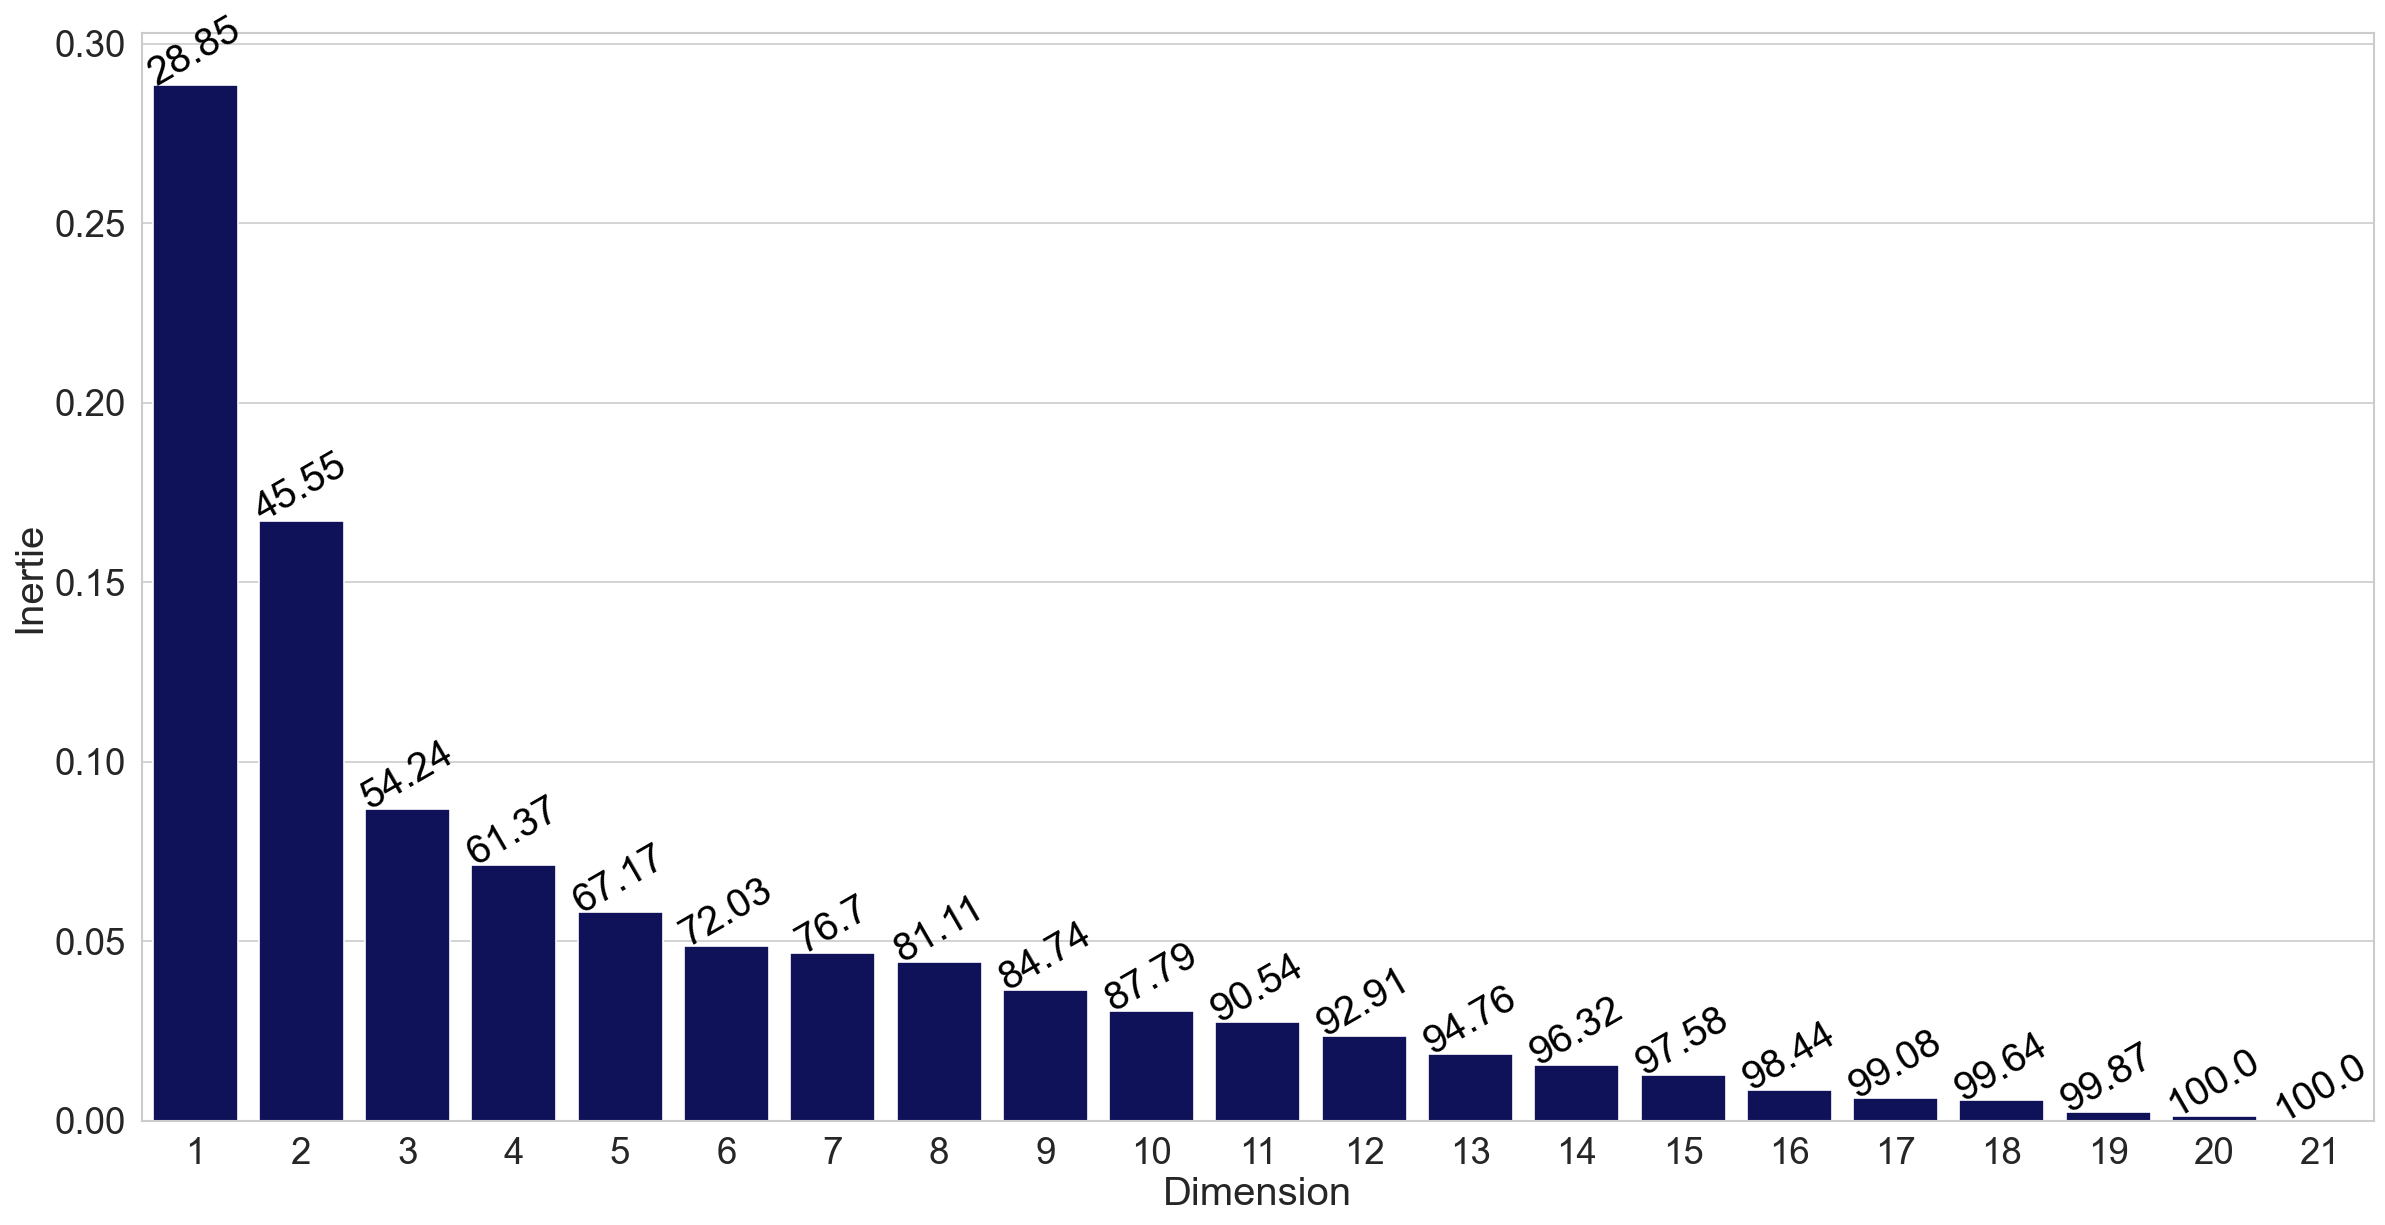

In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=24)

inertie = pd.DataFrame(modelACP.explained_variance_ratio_,columns=['Inertie']) 
inertie['label'] = np.round(modelACP.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(1,22)

plt.figure(figsize=(24,12),dpi=120)
sns.set_style("whitegrid")
g = sns.barplot(x="Dimension",y='Inertie', data=inertie, color="#030764")

for index, row in inertie.iterrows():
    g.text(row.name,row.Inertie, row.label, color='black', ha="center", rotation=30)
    
plt.xlabel('Dimension', fontproperties=font1)
plt.ylabel('Inertie', fontproperties=font1)

plt.show()

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

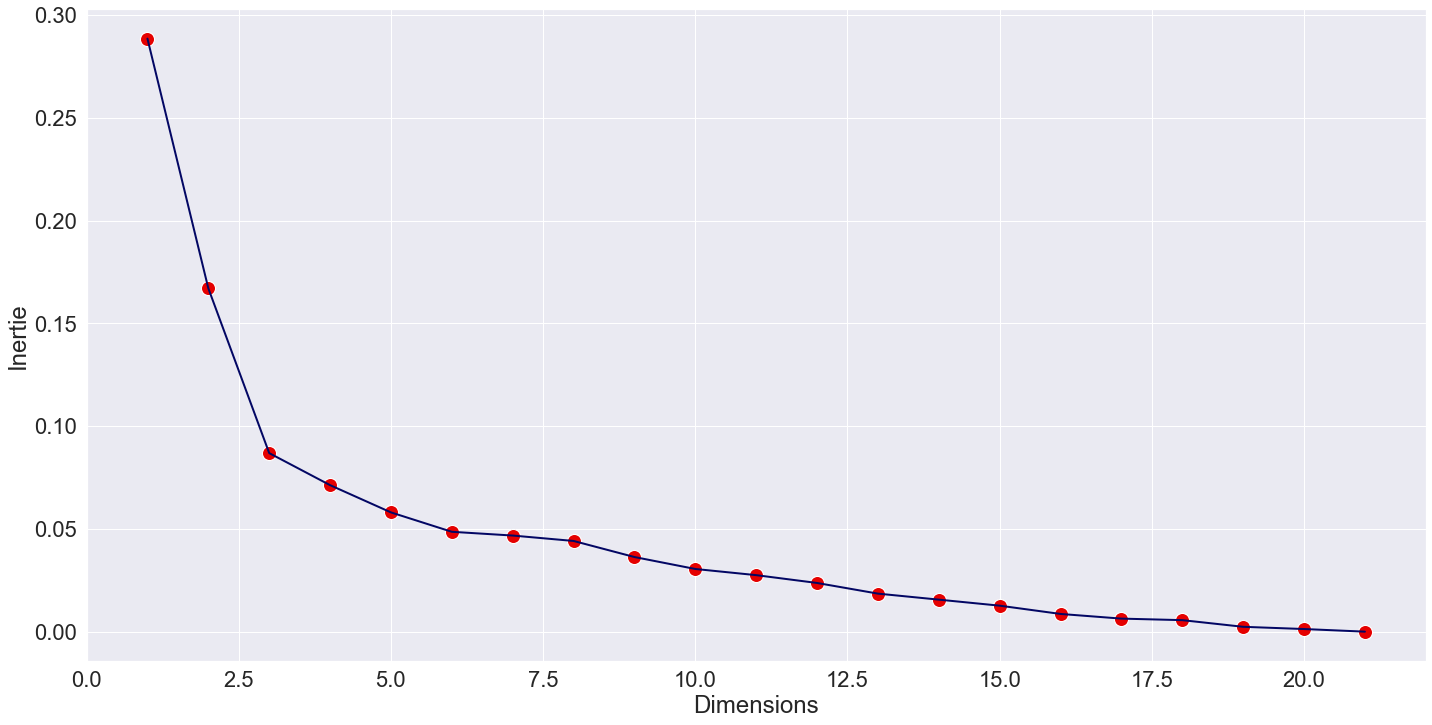

In [18]:
fig, ax = plt.subplots(figsize=(24,12));
graph = sns.lineplot( x='Dimension',
                      y='Inertie',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
                      color     = "#030764");
sns.scatterplot(x     = 'Dimension',
                y     = 'Inertie',
                data  = inertie,
                s     = 200,
                ci    = None, 
                color = "#e50000",
                ax    = graph);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');

In [19]:
X = donnees.drop(columns=['fetal_health'])
y = donnees.fetal_health

# La separation des données pour l'apprentissage

<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonApprentissageTest.png" width="800">

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y.apply(lambda x: label_dict_inv[x]), 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

In [21]:
donnees.loc[X_train.index,'échantillon'] = 'apprentissage'
donnees.loc[X_test.index ,'échantillon'] = 'test'

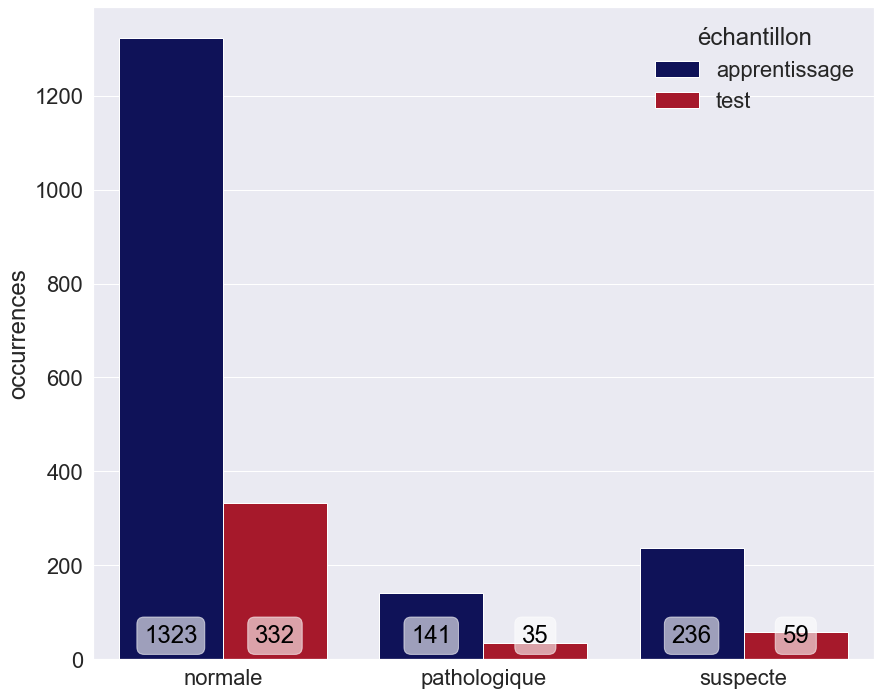

In [22]:
plt.figure(figsize=(14,12))
graph = sns.countplot(x='fetal_health',
                      hue='échantillon',
                      data=donnees.sort_values(['fetal_health','échantillon']), 
                      palette=palette[:2]
                     );

for i,nb in enumerate(donnees.groupby(['fetal_health','échantillon']).histogram_width.count()):
    if i%2 == 0 : val = i/2
    delta =  val - 0.2 +(i%2)*0.4
    graph.text(
                delta ,
                50,
                nb,
                color='black',
#                 rotation='vertical',
#                 size='large',
#                 fontsize='large',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

graph.set_ylabel('occurrences');
graph.set_xlabel('');
# if (graphResultats):
#     initConfig.sauvegarderImage("Les enregistrements par diagnostique et échantillon-{0}".format(
#                       dt.now().strftime('%Y_%m_%d_%H.%M.%S'))) 

In [23]:
X_train.shape, X_test.shape

((1700, 21), (426, 21))

# Le déclaration des classifieurs 

In [24]:
names = [
            'Random_Forest',
            'AdaBoost',
            'LightGBM',
            'XGBoost',
            'LogisticRegression',
            'Stochastic_GD',
            'Gaussian_Process',
            'Nearest_Neighbors',
            'Linear_SVMC', 
            'NonLinaire_SVMC',
            'GaussianNaiveBayes',
            'QuadraticDiscriminant',
            'Neural_Net'
        ]

classifiers = [
            RandomForestClassifier(
                max_depth=6,
                max_features=3,
                min_samples_split=4,
                n_estimators=52,
                n_jobs=-1
            ),
            AdaBoostClassifier(
                n_estimators=52
            ),    
            LGBMClassifier(
                learning_rate=0.1,
                n_estimators=56,
                num_leaves=20,
                reg_alpha=0.1,
                reg_lambda=20,
            ),
            XGBClassifier(
                objective='binary:logistic',
                eval_metric='auc',
                n_estimators=52,
                max_depth=6,
                use_label_encoder=False
            ),
            LogisticRegression(
                C=0.81113,
                max_iter=800,
                penalty='l2',
                solver='lbfgs',
                n_jobs=-1
            ),
            SGDClassifier(
                loss='log', 
                alpha=0.01, 
                max_iter=200, 
                fit_intercept=True
            ),
            GaussianProcessClassifier(
                n_jobs=-1
            ),
            KNeighborsClassifier(
                algorithm='ball_tree',
                n_neighbors=17,
                p=1,
                weights='distance',
                n_jobs=-1
            ),
            SVC(
                kernel="linear" , 
                C=0.025, 
                probability=True),
            NuSVC(
                kernel="rbf",
                gamma=0.5,
                nu=0.195,
                probability=True,
            ),
            GaussianNB(),
            QuadraticDiscriminantAnalysis(),
            MLPClassifier(
                alpha=1
            ),
        ]

classifieursDict = {name:OneVsRestClassifier(clf) for name, clf in zip(names, classifiers)}           

In [25]:
classifieursDict.pop('NonLinaire_SVMC')

OneVsRestClassifier(estimator=NuSVC(gamma=0.5, nu=0.195, probability=True))

# Le choix des classifieurs 

In [26]:
def afficheCourbeROC(vraisPositifs,fauxPositifs,aucROCt,nbClasses,lw,nom,label_dict):
    plt.figure(figsize=(24, 24));
    for i, color in zip(range(nbClasses), palette):
        plt.plot(fauxPositifs[i], vraisPositifs[i], color=color, lw=lw,
                 label=' ' + label_dict[i+1] + ' (AUC = {1:0.8f})'
                                                         ''.format(i, aucROCt[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('(1 - Spécificité) = VN / (FP + VN)', size=18)
    plt.ylabel('Sensibilité = VP / (VP + FN)', size=18)
    plt.title('La courbe ROC multi-class -- ' + nom, size=20)
    plt.legend(loc="lower right", fontsize='large')

#     sauvegarderImage('La courbe ROC multi-class -- ' + nom)
    plt.show()

In [27]:
cvF1, cvF1SD, cvAccuracy, cvAccSD, aucROC, avgPrecRec, accuracy, balanced_accuracy, logloss, hammingloss, precision, sensibilite, \
f1, f2, f05, jaccard, vrais_negatifs, faux_positifs, faux_negatifs, vrais_positifs, total_positifs, aucROCtn = \
    dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(),\
    dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict()
#
oneloss, precision_micro, precision_macro, precision_weighted, \
sensibilite_macro, sensibilite_micro, sensibilite_weighted, \
f1_micro, f1_macro, f1_weighted,f2_micro,f2_macro,f2_weighted,f05_micro,f05_macro,f05_weighted = \
    dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict(), \
    dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict()

fauxPositifs, vraisPositifs, prec, rec, aucROCt, pr_auc, tauxROC, tauxPR = dict(), dict(), dict(), dict(), dict(), dict(), dict(), dict()

<Figure size 2304x2304 with 0 Axes>

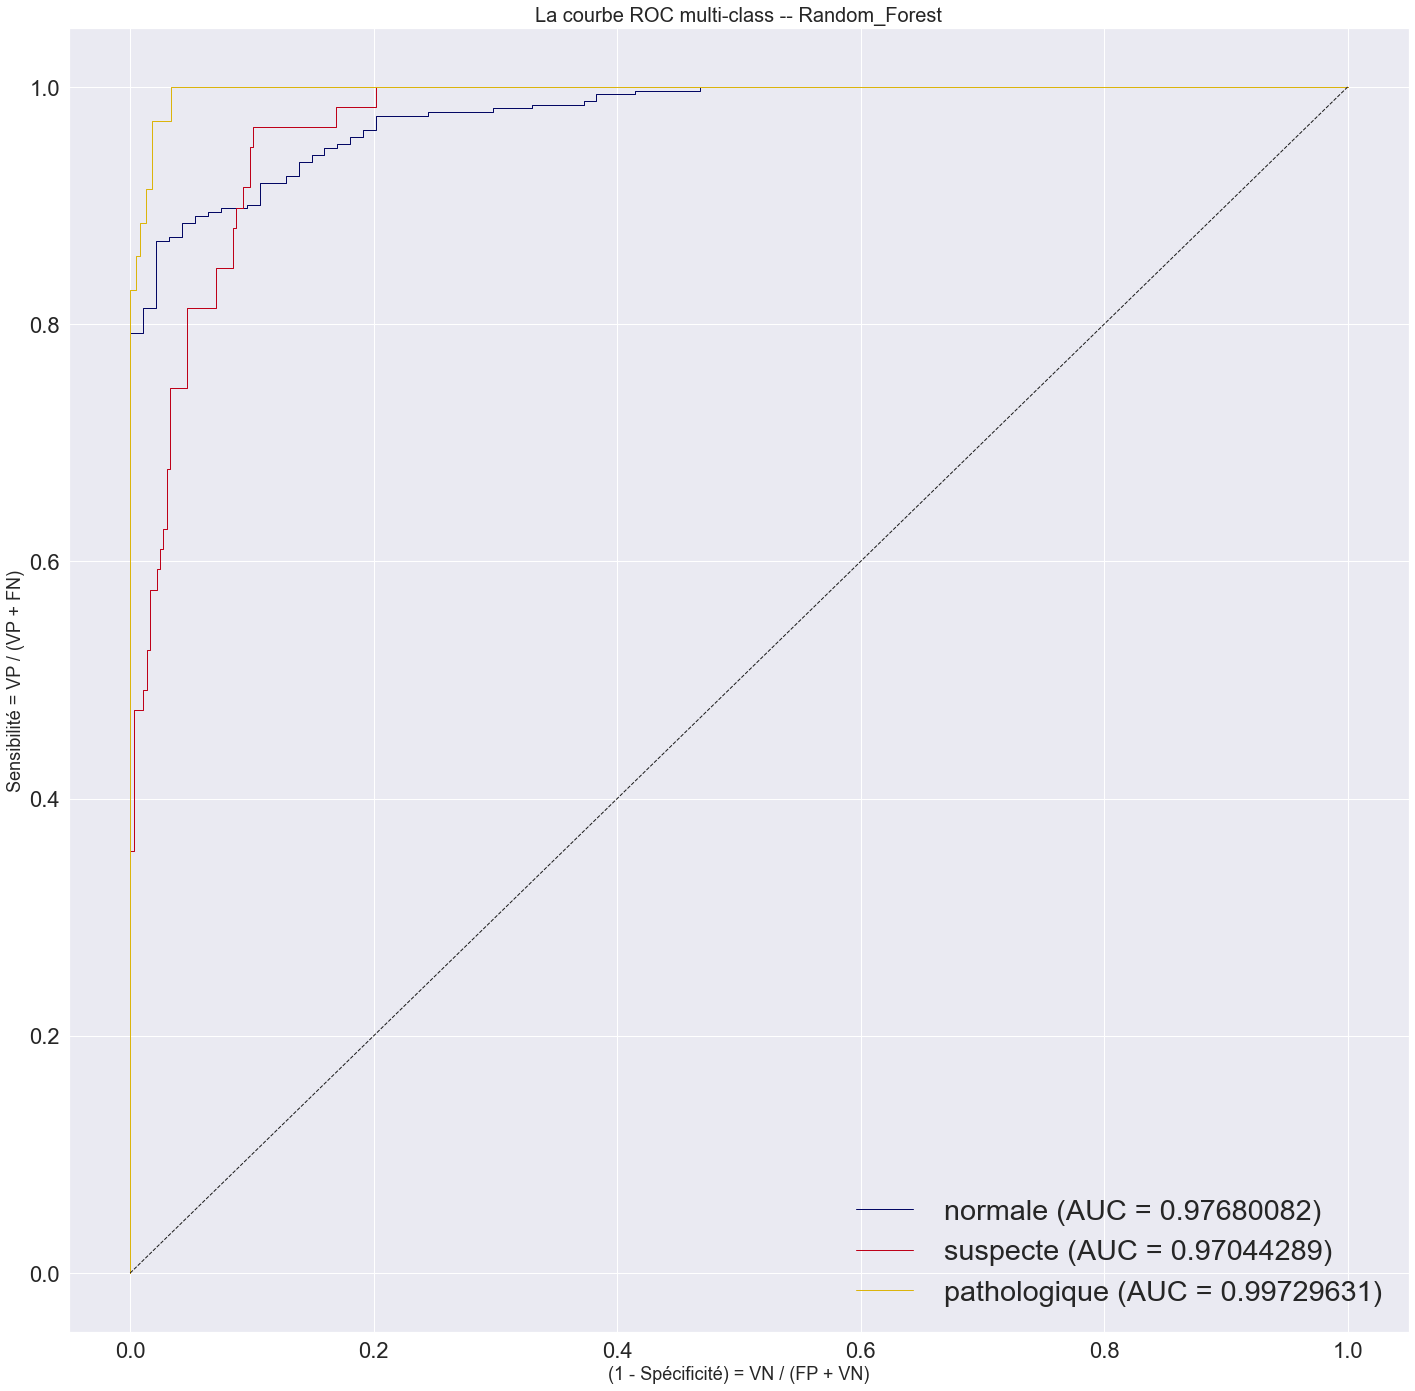

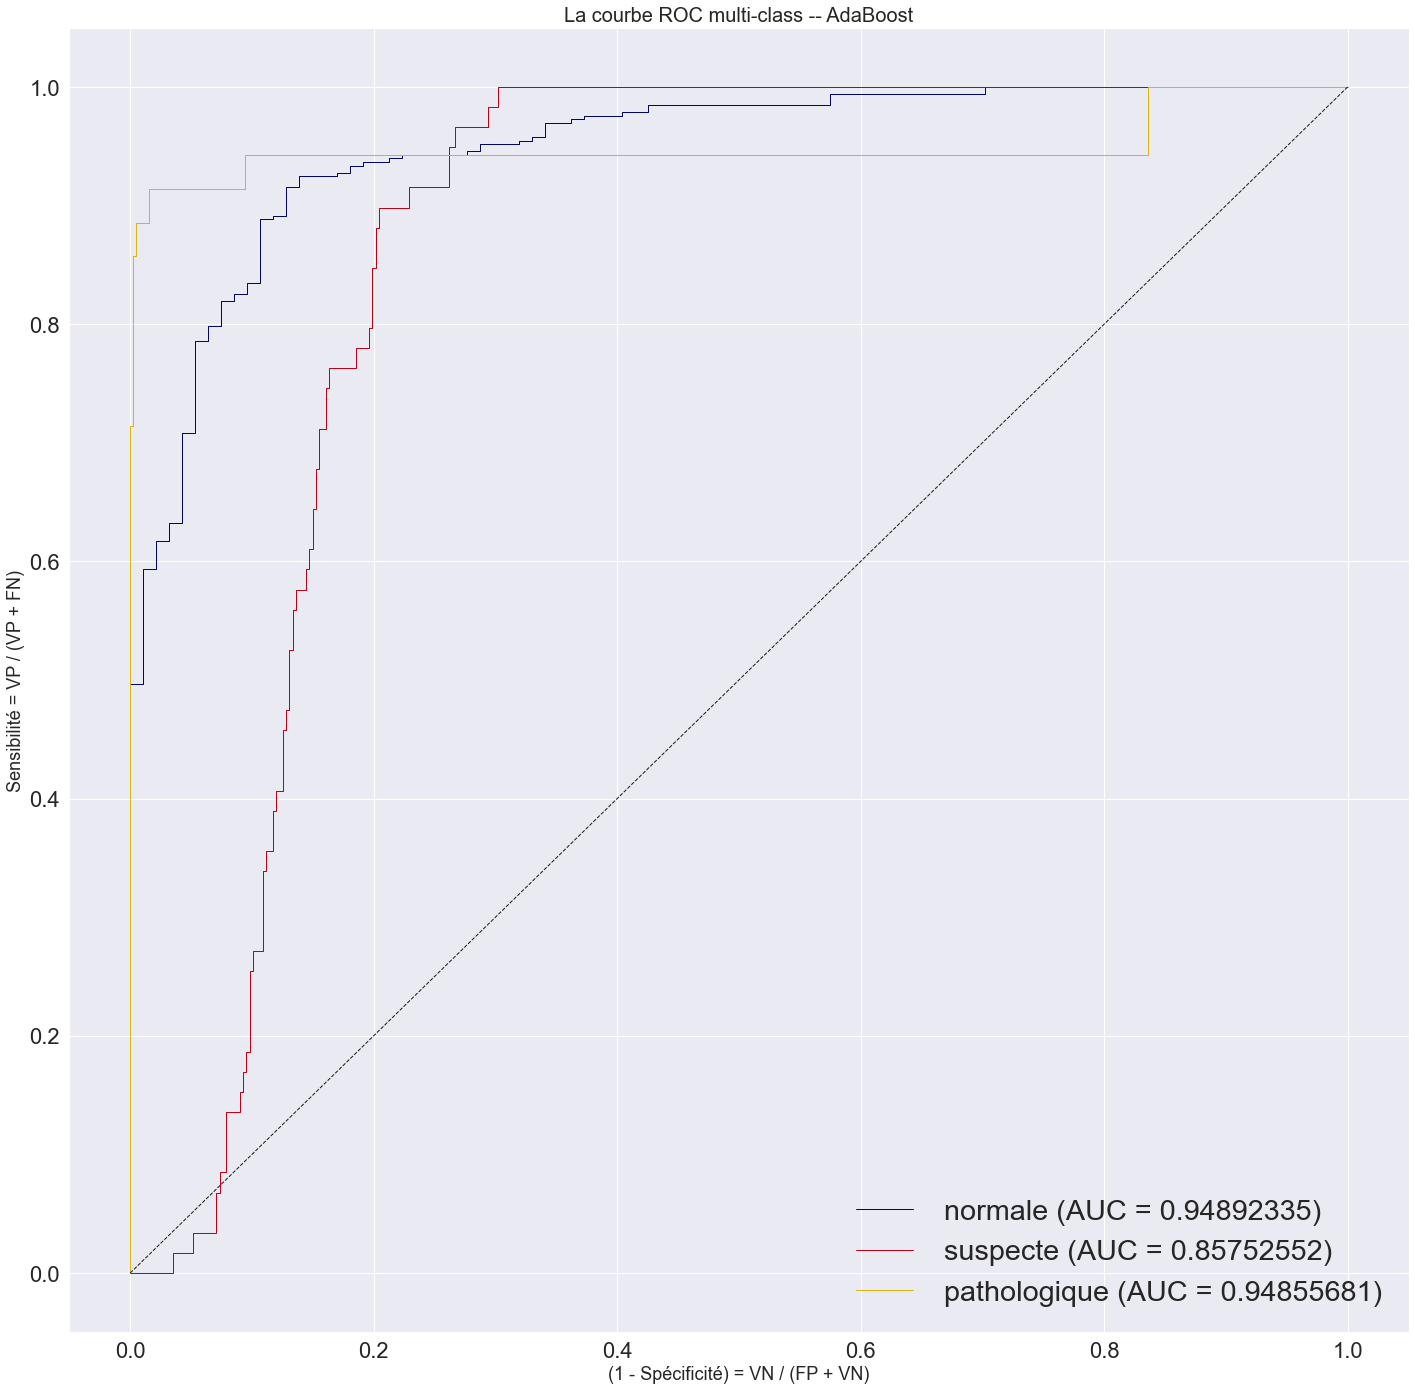

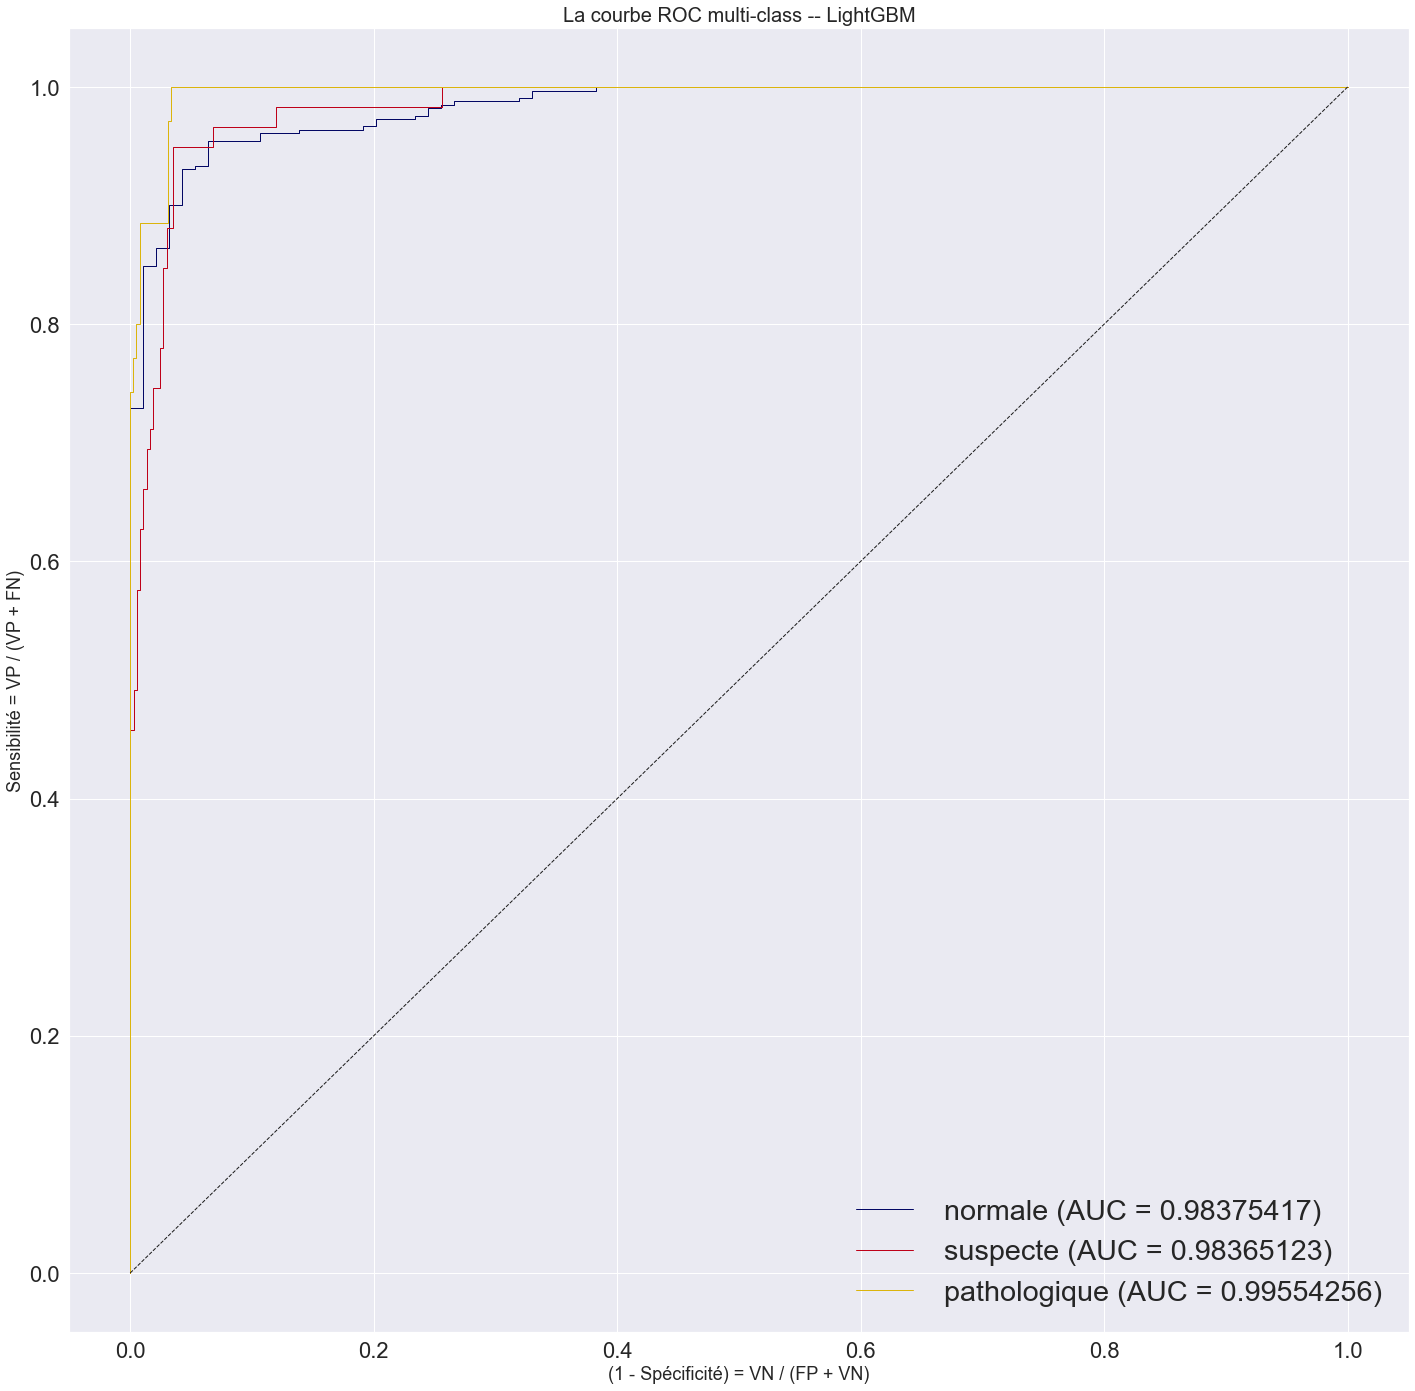

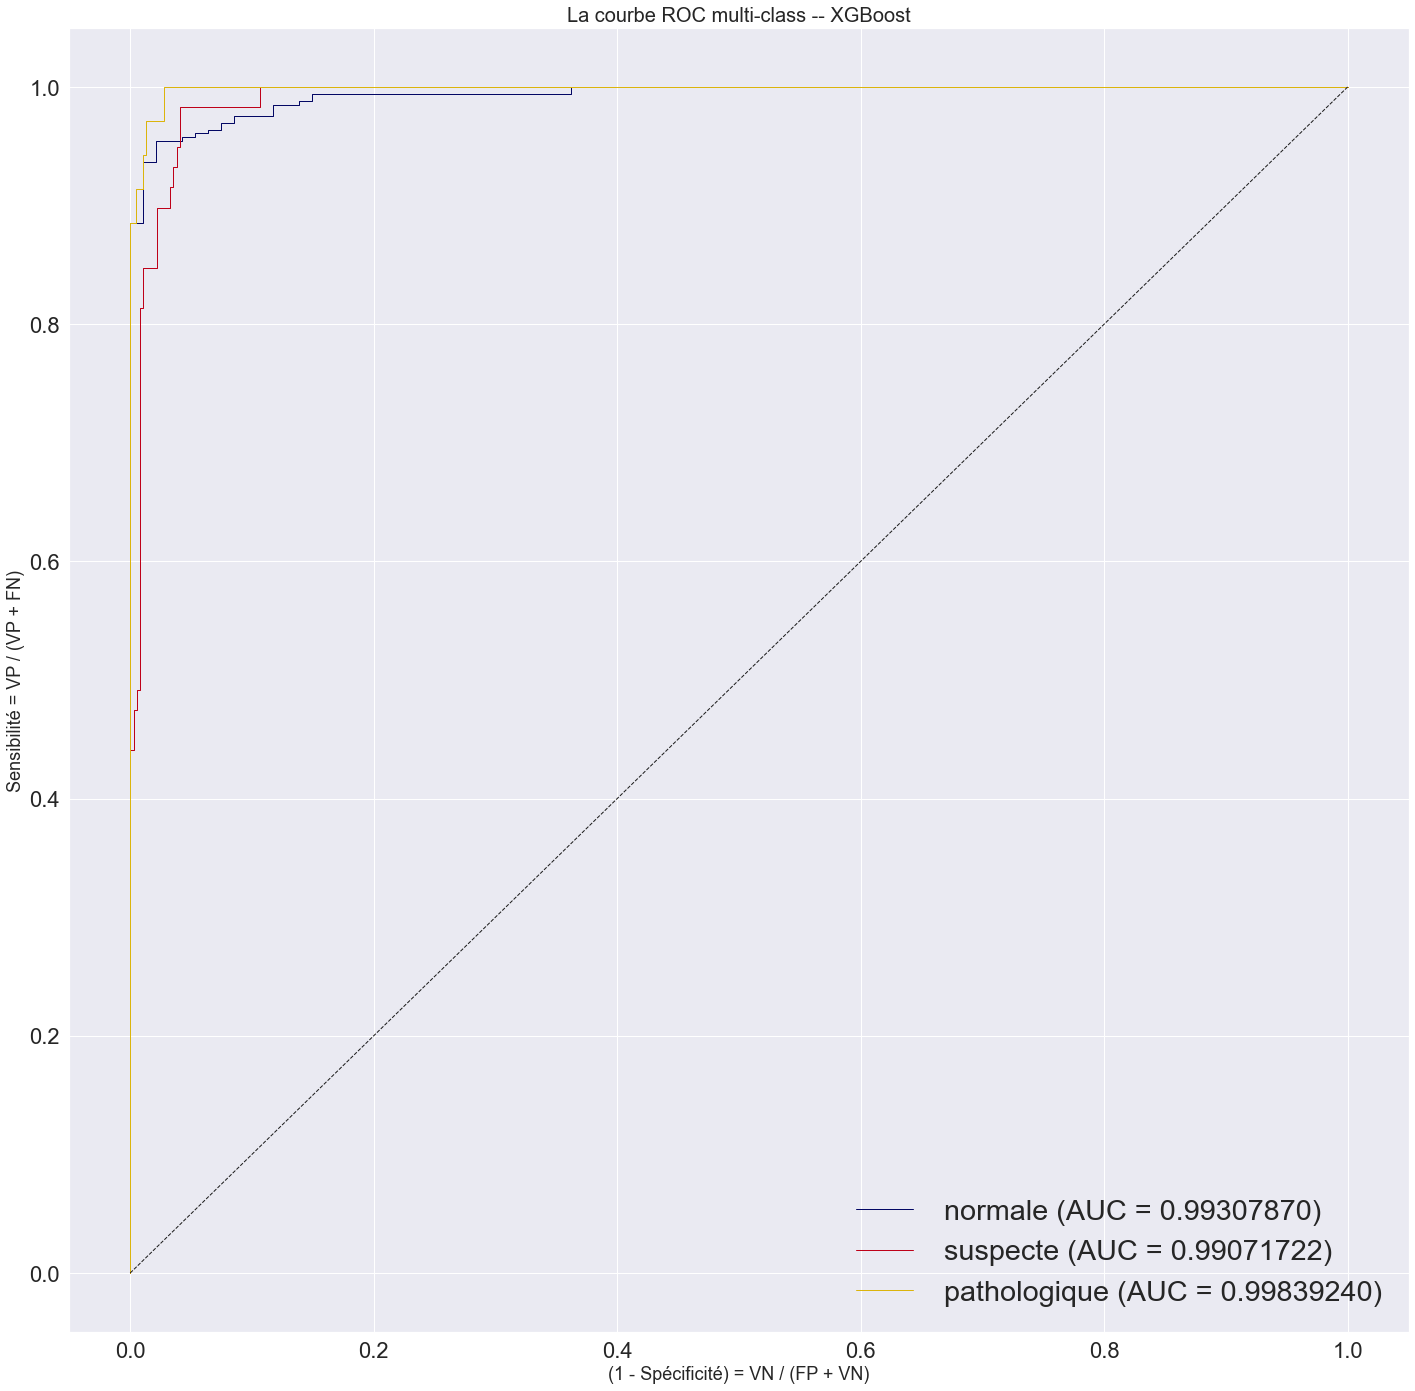

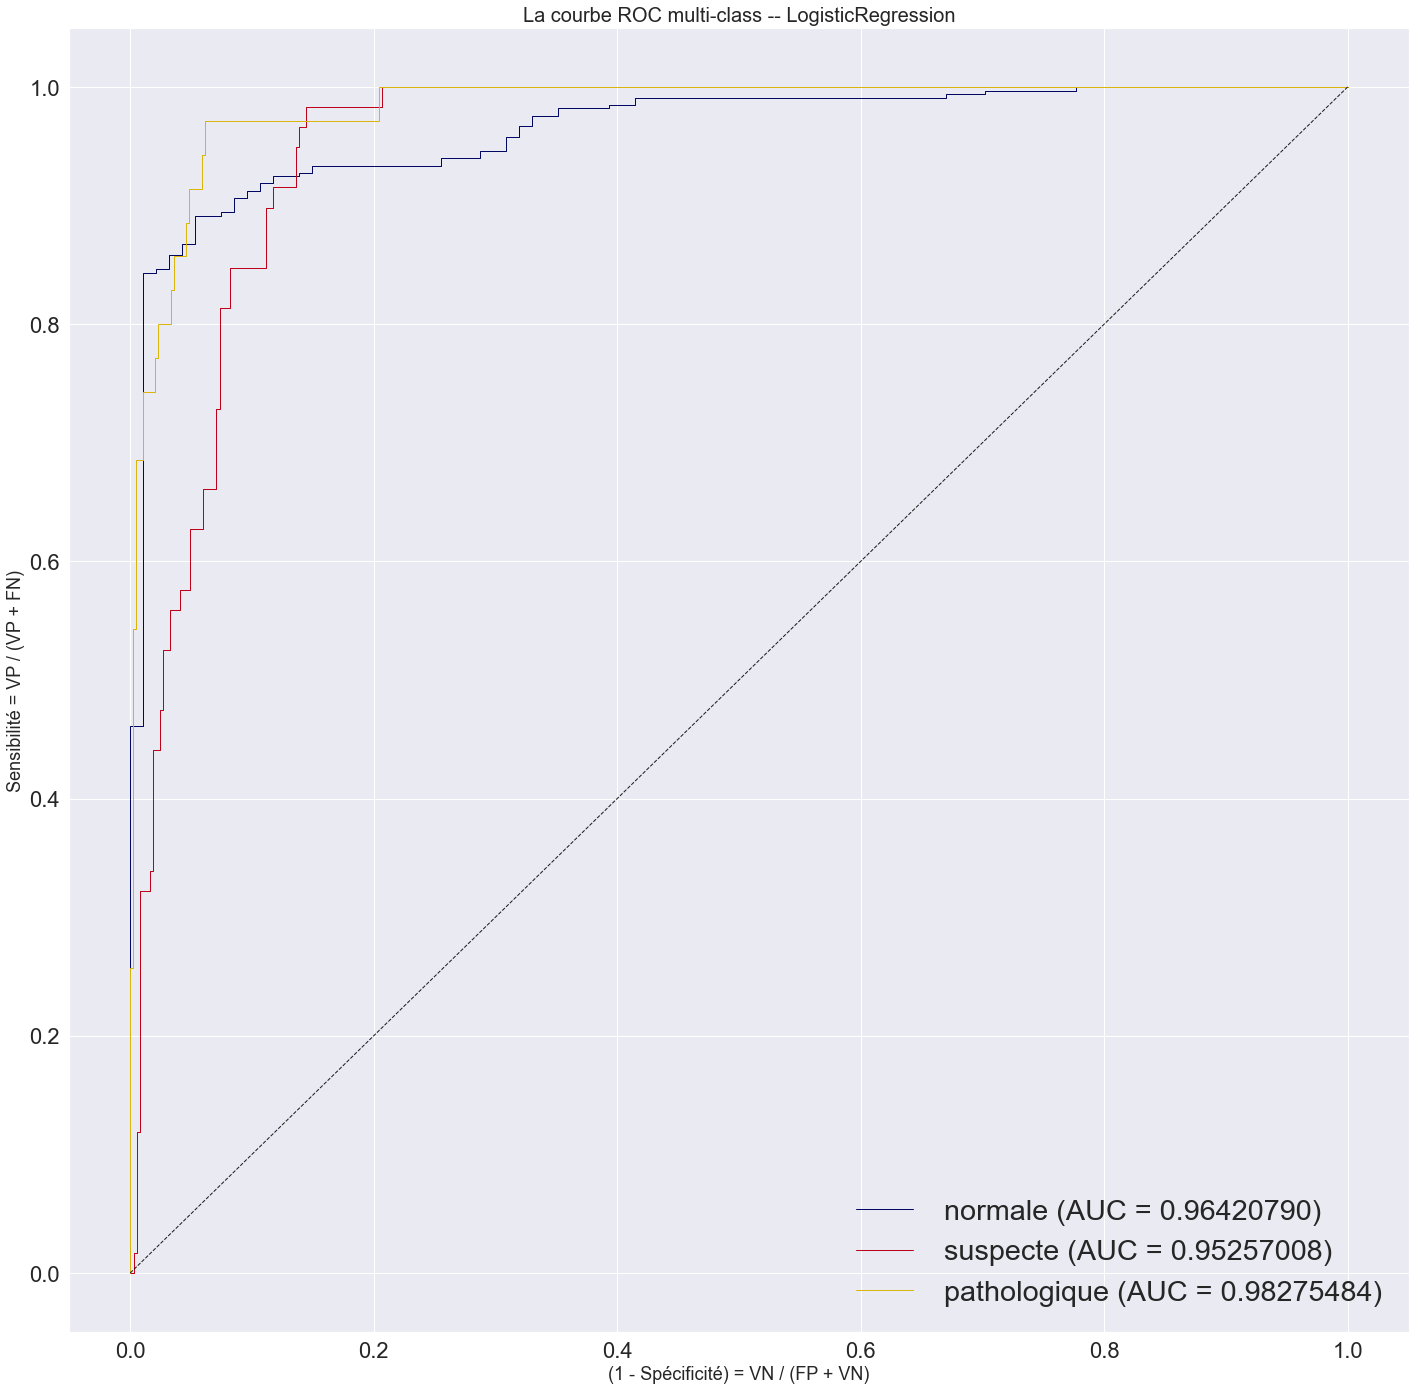

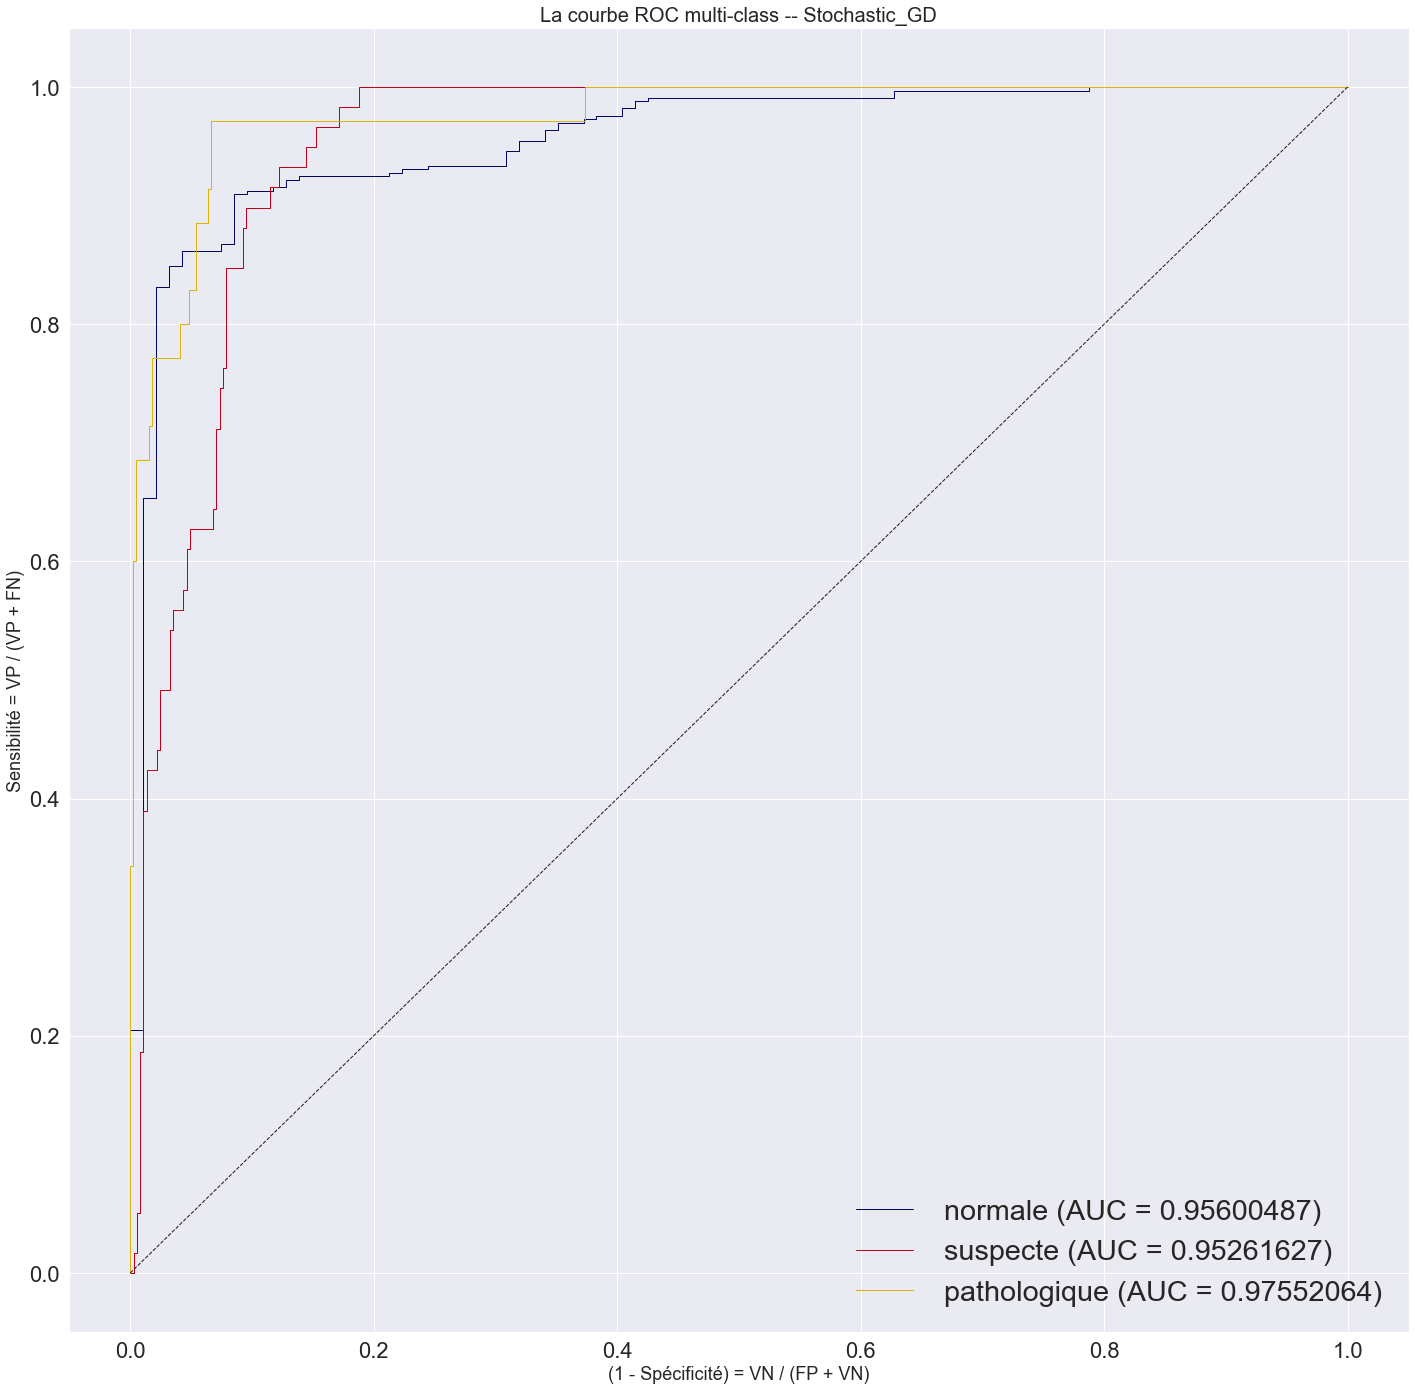

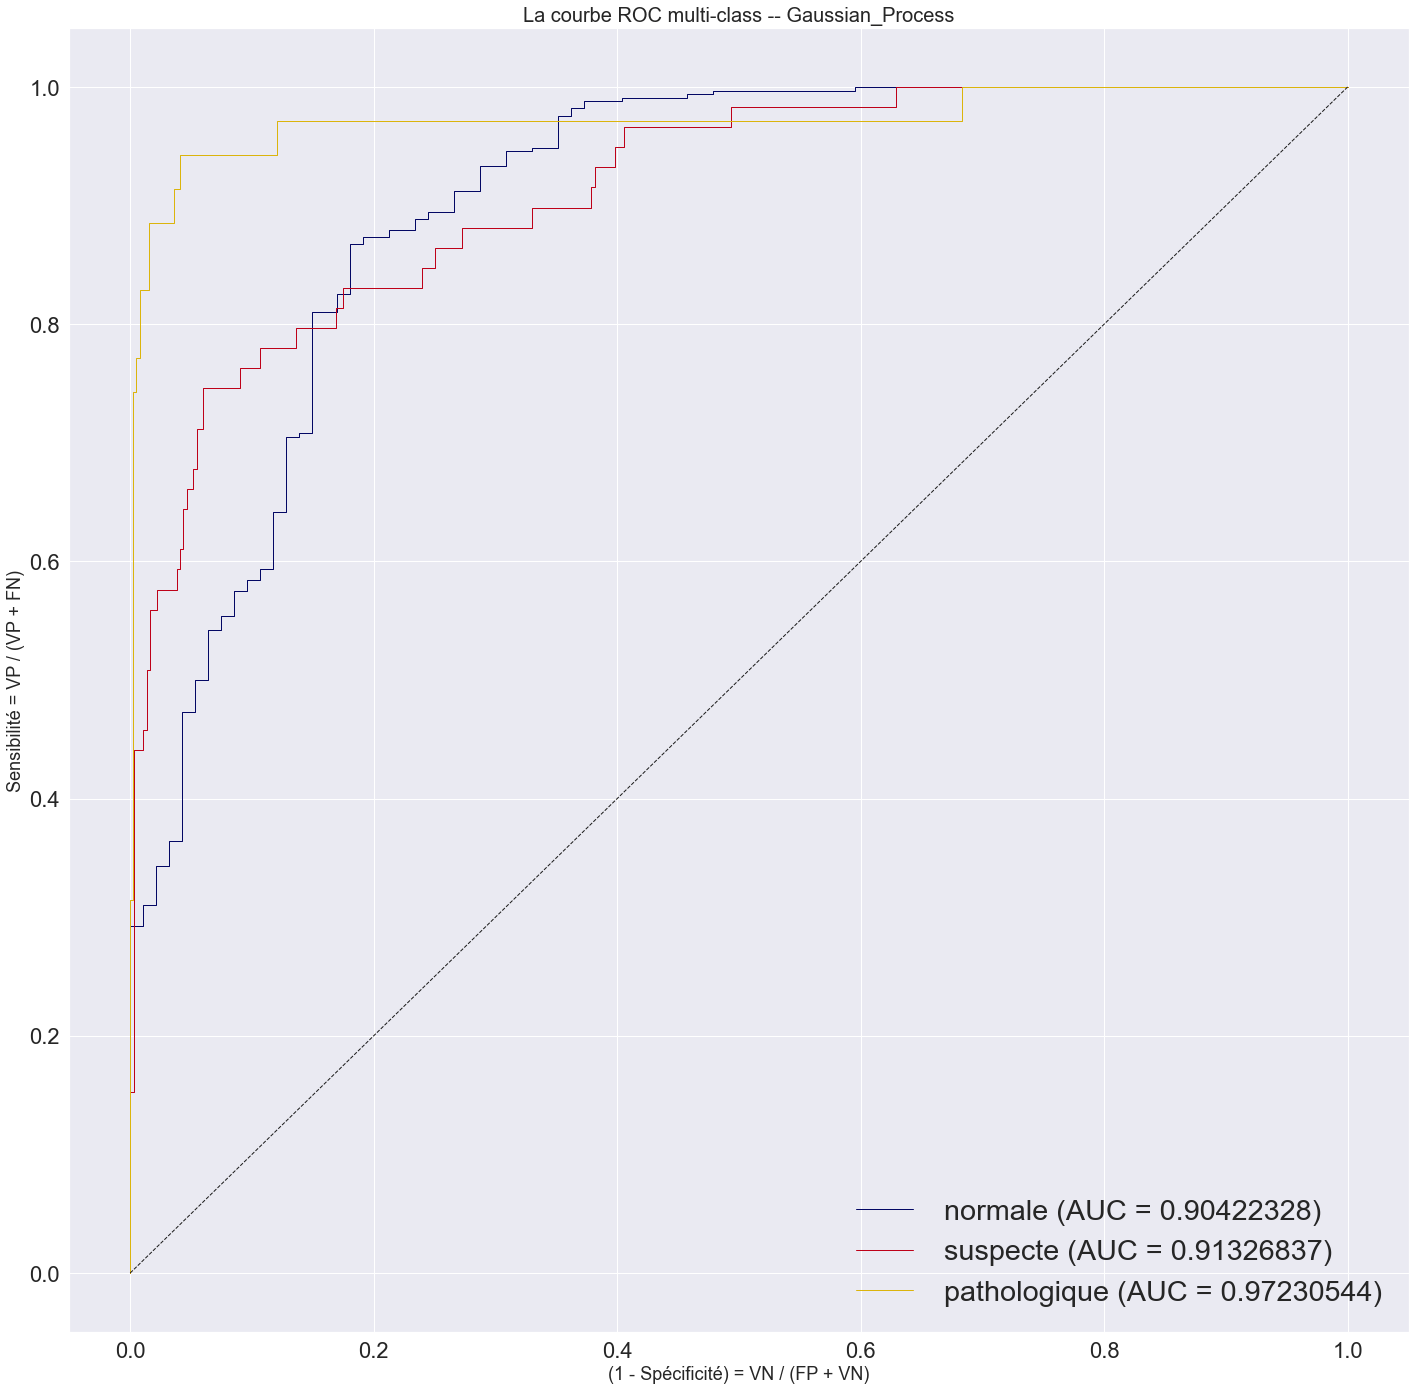

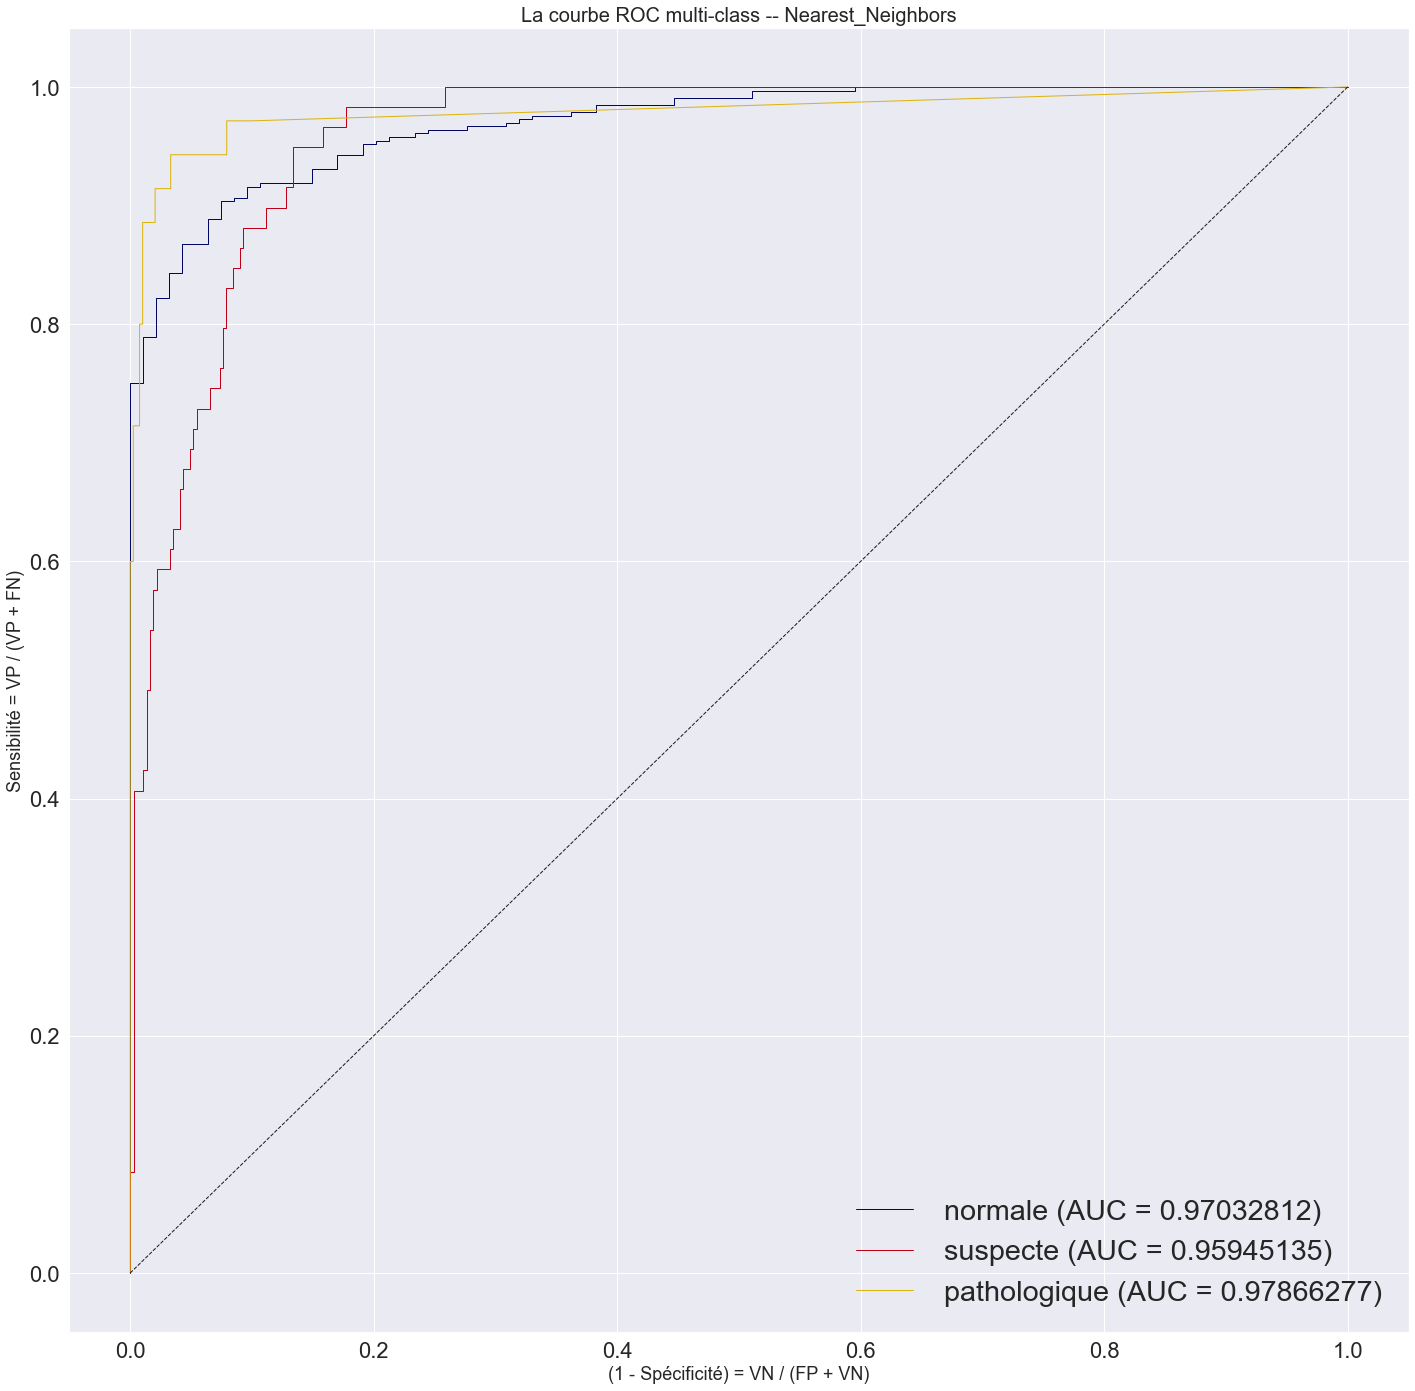

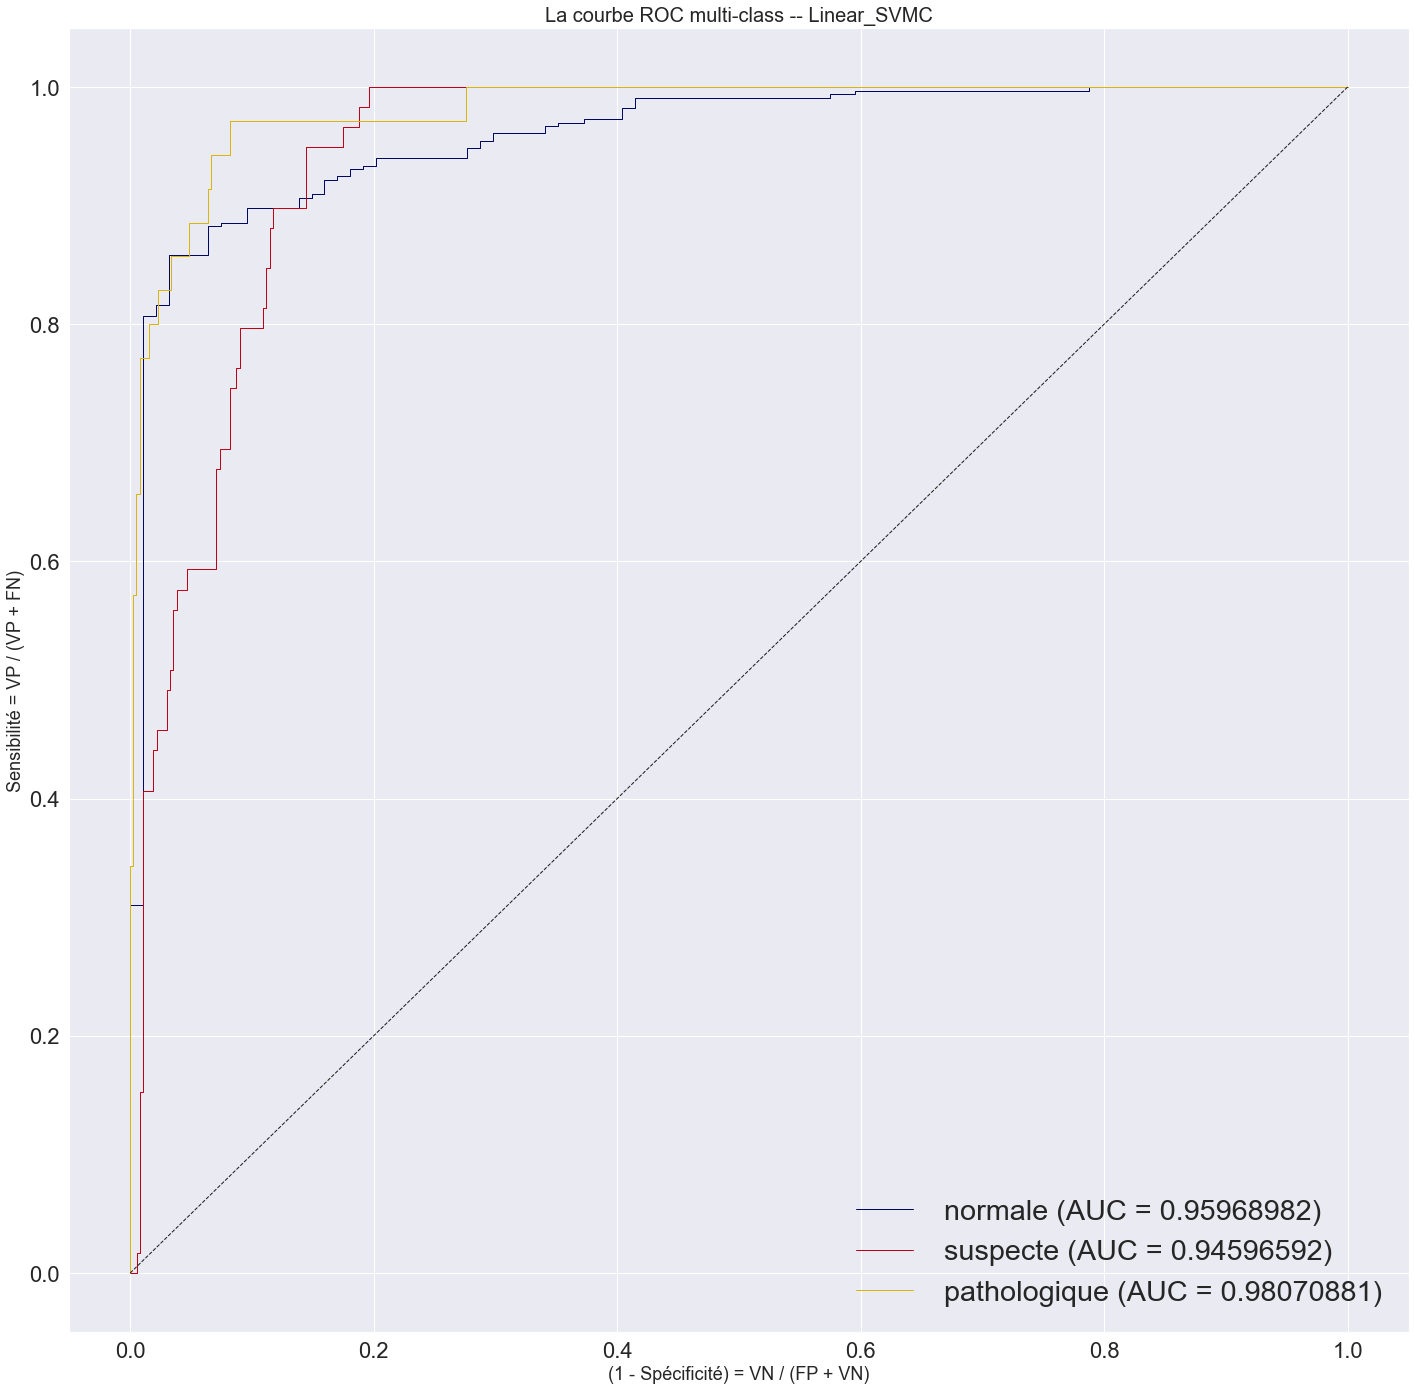

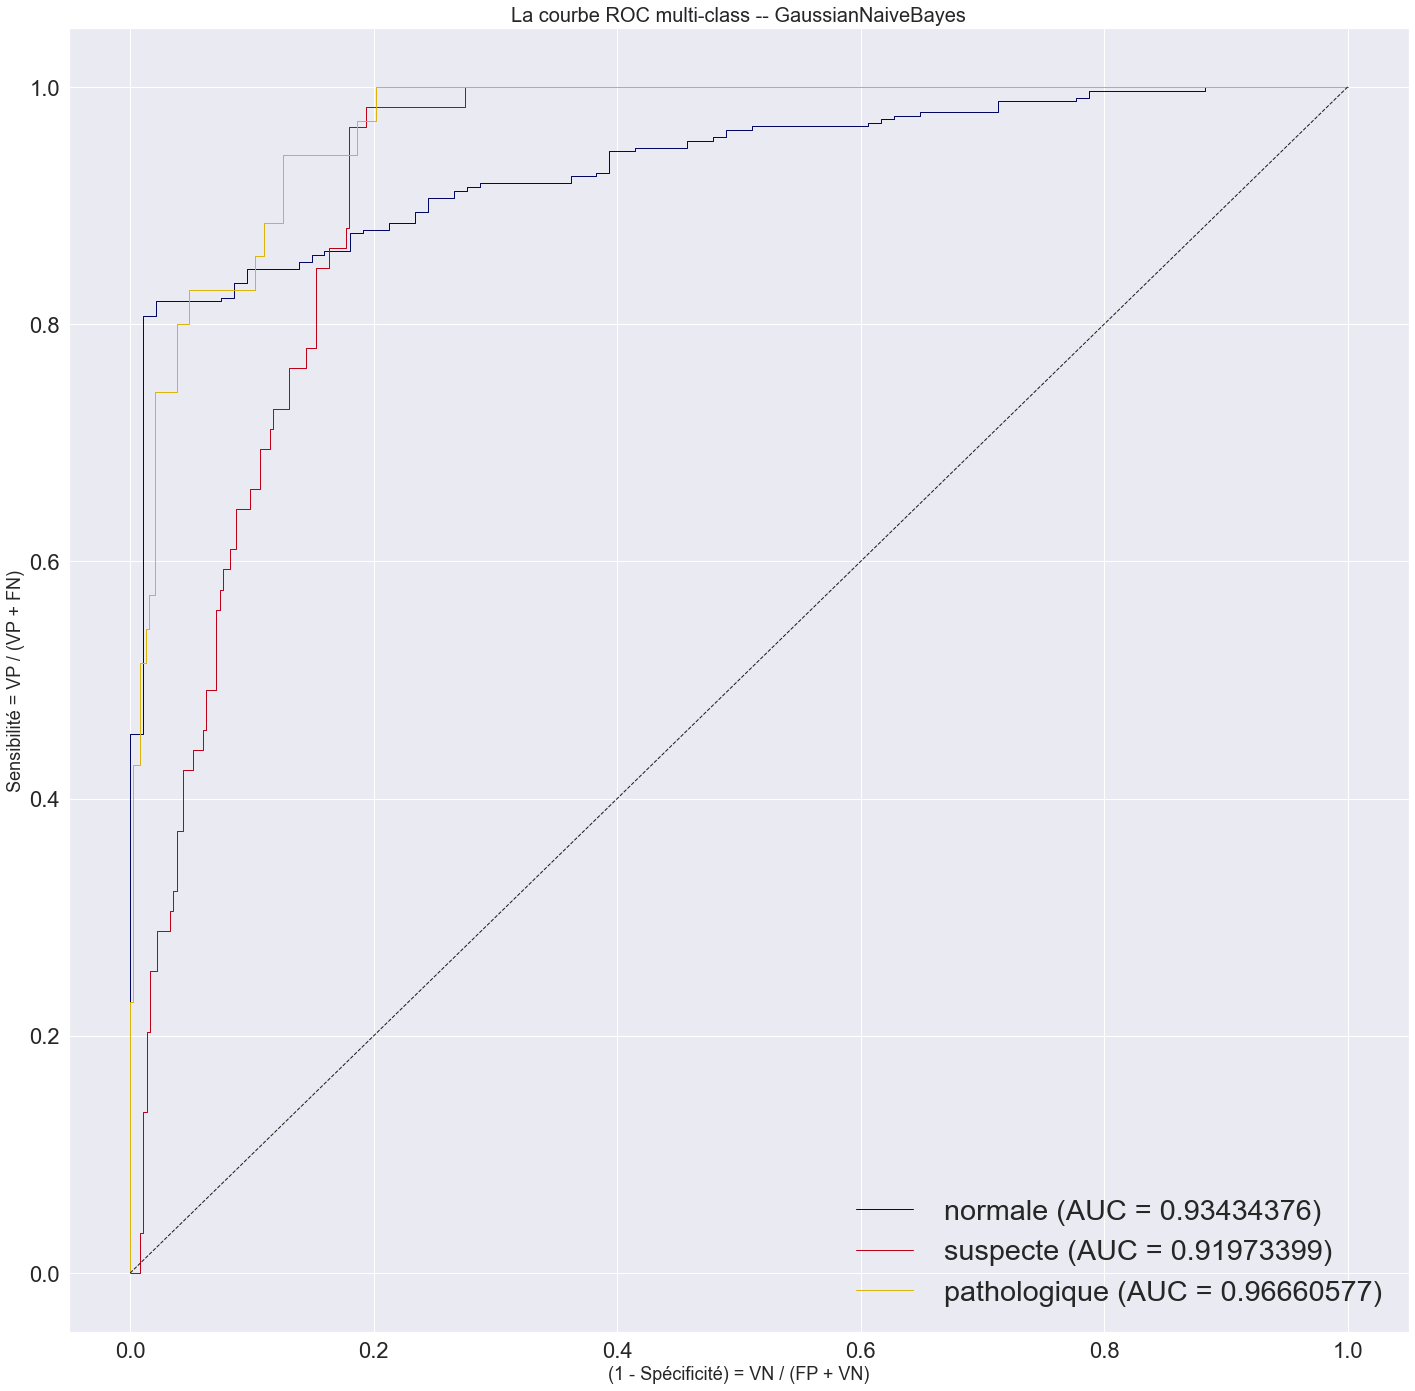

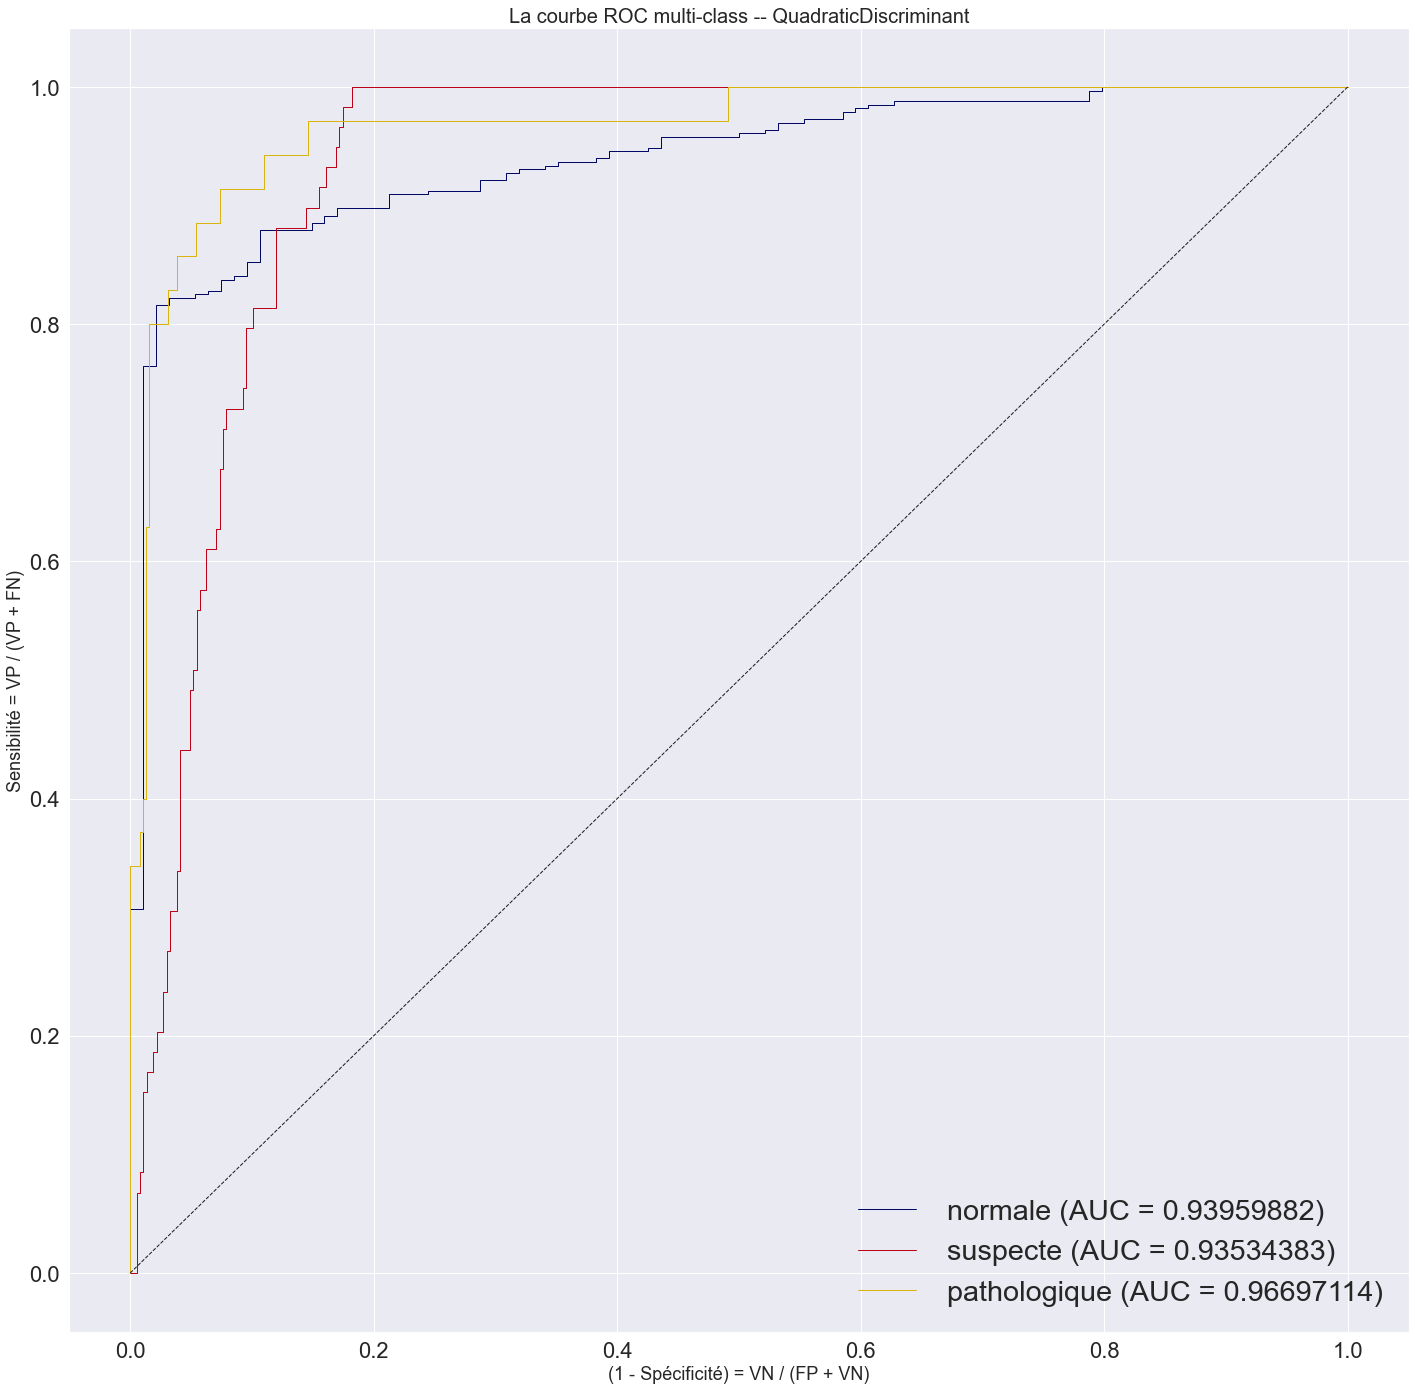

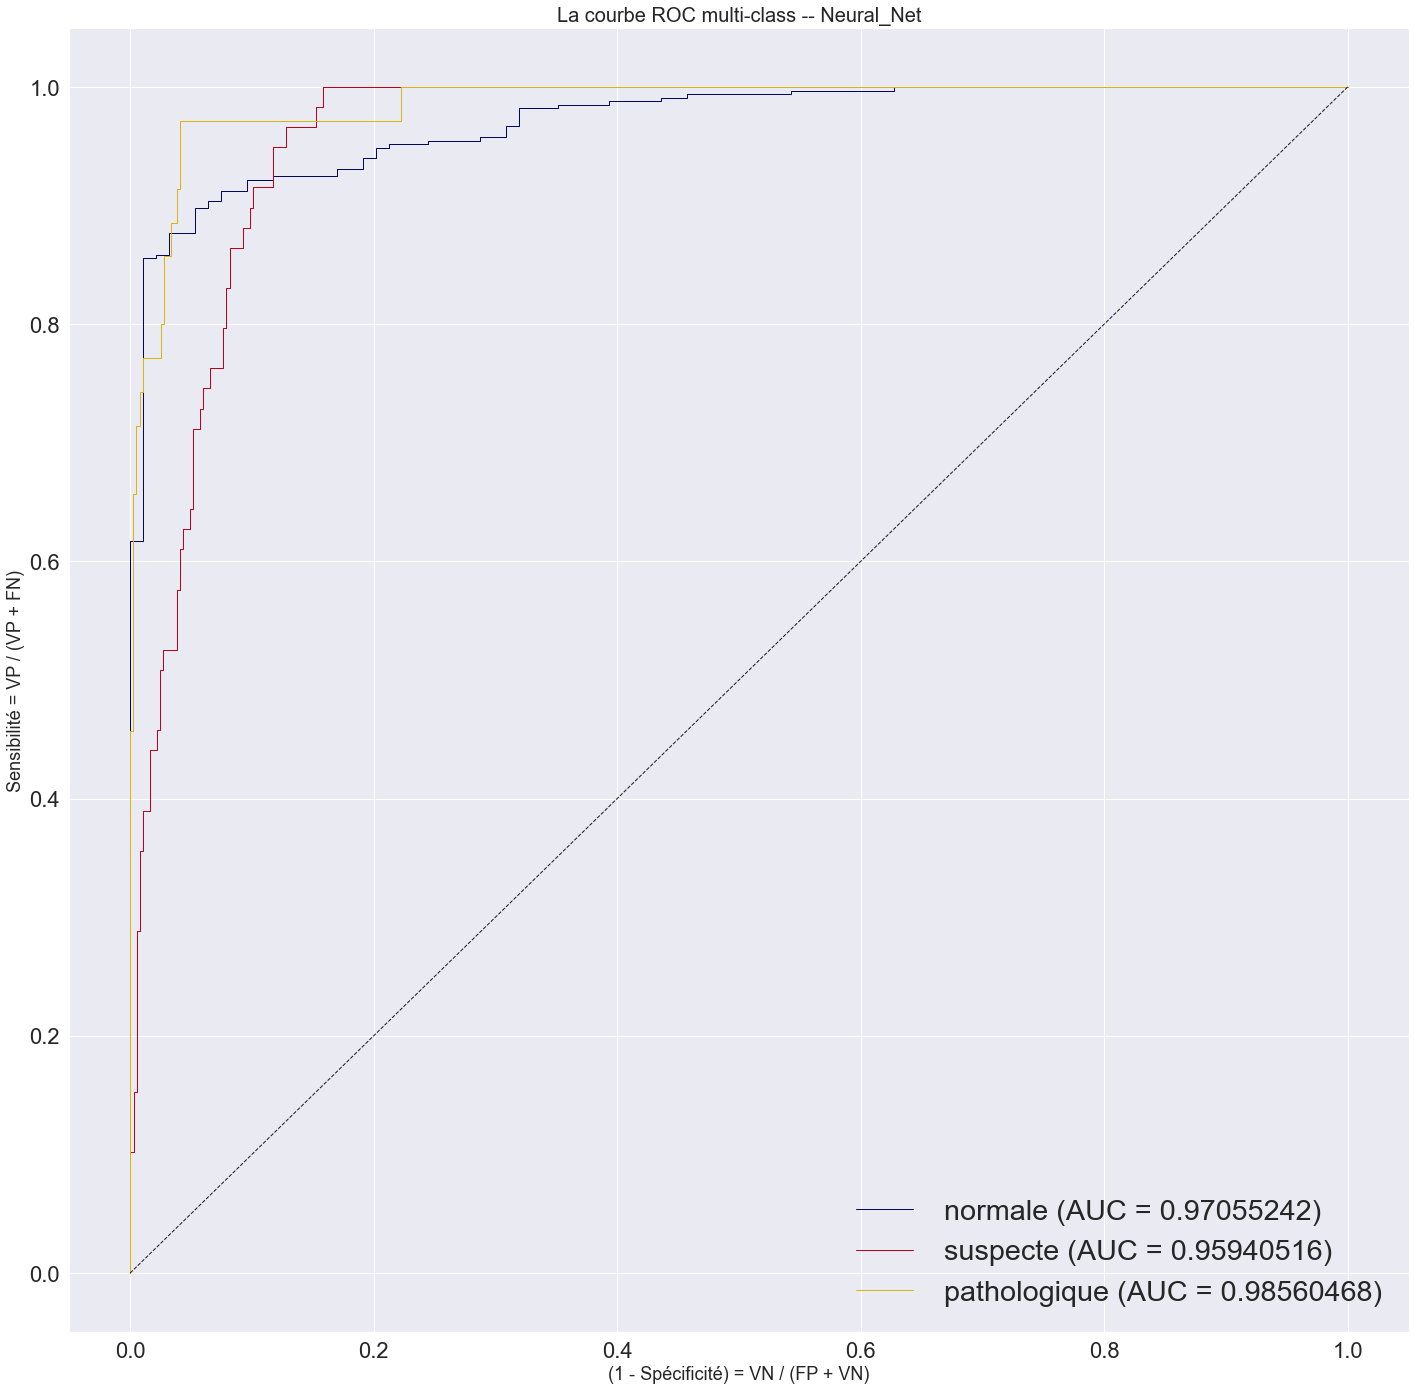

In [28]:
lw = 1
couleurs    = sns.hls_palette(len(classifieursDict.keys()), l=.4, s=.9)
nbClasses   = len(y_train.sort_values().unique())
listClasses = y_train.sort_values().unique()

y_trainA = label_binarize(y_train, classes=listClasses)
y_testA  = label_binarize(y_test, classes=listClasses)

plt.figure(figsize=(32,32))

for nom in classifieursDict:
    classifier = classifieursDict[nom]

    classifier.fit(X_train, y_train)

    y_score     = classifier.predict_proba(X_test)
    y_pred      = classifier.predict(X_test)
    y_predA     = label_binarize(y_pred, classes=listClasses)

    accuracy[(nom, 'global')]              = accuracy_score(y_test, y_pred)
    balanced_accuracy[(nom, 'global')]     = balanced_accuracy_score(y_test, y_pred)
    precision[(nom, 'global')]             = precision_score(y_test, y_pred, average='weighted')
    sensibilite[(nom, 'global')]           = recall_score(y_test, y_pred, average='weighted')

    f1[(nom, 'global')]                    = f1_score(y_test, y_pred, average='weighted')
    f2[(nom, 'global')]                    = fbeta_score(y_test, y_pred, beta=2, average='weighted')
    f05[(nom, 'global')]                   = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')

    vrais_negatifs[(nom, 'global')]        = 0
    faux_positifs [(nom, 'global')]        = 0
    faux_negatifs [(nom, 'global')]        = 0
    vrais_positifs[(nom, 'global')]        = 0
    total_positifs[(nom, 'global')]        = 0


    aucROC[(nom, 'global')] = roc_auc_score(y_test, y_score, multi_class='ovr')
    
    for i in range(nbClasses):
        fauxPositifs[i], vraisPositifs[i], tauxROC[i] = roc_curve(y_testA[:, i], y_score[:, i])
        aucROCt[i]                                    = auc(fauxPositifs[i], vraisPositifs[i])
        prec[i], rec[i], tauxPR[i]                    = precision_recall_curve(y_testA[:, i], y_score[:, i])

        aucROC[(nom, label_dict[i+1])]                = aucROCt[i]
        avgPrecRec[(nom, label_dict[i+1])]            = average_precision_score(y_testA[:, i], y_score[:, i])
        accuracy[(nom, label_dict[i+1])]              = accuracy_score(y_testA[:, i], y_predA[:, i])
        balanced_accuracy[(nom, label_dict[i+1])]     = balanced_accuracy_score(y_testA[:, i],y_predA[:, i])
        logloss[(nom, label_dict[i+1])]               = log_loss(y_testA[:, i], y_predA[:, i])
        hammingloss[(nom, label_dict[i+1])]           = hamming_loss(y_testA[:, i], y_predA[:, i])
        precision[(nom, label_dict[i+1])]             = precision_score(y_testA[:, i], y_predA[:, i])
        sensibilite[(nom, label_dict[i+1])]           = recall_score(y_testA[:, i], y_predA[:, i])
        f1[(nom, label_dict[i+1])]                    = f1_score(y_testA[:, i], y_predA[:, i])
        f2[(nom, label_dict[i+1])]                    = fbeta_score(y_testA[:, i], y_predA[:, i], beta=2)
        f05[(nom, label_dict[i+1])]                   = fbeta_score(y_testA[:, i], y_predA[:, i], beta=0.5)
      
        jaccard[(nom, label_dict[i+1])]               = jaccard_score(y_testA[:, i], y_predA[:, i])
        vrais_negatifs[(nom, label_dict[i+1])]        = confusion_matrix(y_testA[:, i], y_predA[:, i])[0, 0]
        faux_positifs[(nom, label_dict[i+1])]         = confusion_matrix(y_testA[:, i], y_predA[:, i])[0, 1]
        faux_negatifs[(nom, label_dict[i+1])]         = confusion_matrix(y_testA[:, i], y_predA[:, i])[1, 0]
        vrais_positifs[(nom, label_dict[i+1])]        = confusion_matrix(y_testA[:, i], y_predA[:, i])[1, 1]
        total_positifs[(nom, label_dict[i+1])]        = vrais_positifs[(nom, label_dict[i+1])] + faux_negatifs [(nom, label_dict[i+1])]
        vrais_negatifs[(nom, 'global')]              += vrais_negatifs[(nom, label_dict[i+1])]
        faux_positifs [(nom, 'global')]              += faux_positifs [(nom, label_dict[i+1])]
        faux_negatifs [(nom, 'global')]              += faux_negatifs [(nom, label_dict[i+1])]
        vrais_positifs[(nom, 'global')]              += vrais_positifs[(nom, label_dict[i+1])]
    

    total_positifs[(nom, 'global')] = vrais_positifs[(nom, 'global')] + faux_negatifs [(nom, 'global')]


    fauxPositifs["micro"], vraisPositifs["micro"], _ = roc_curve(y_testA.ravel(), y_score.ravel())
    aucROCt["micro"]                                 = auc(fauxPositifs["micro"], vraisPositifs["micro"])

    listFauxPositifs = np.unique(np.concatenate([fauxPositifs[i] for i in range(nbClasses)]))
    moyenneVraisPositifs = np.zeros_like(listFauxPositifs)
    for i in range(nbClasses):
        moyenneVraisPositifs += np.interp(listFauxPositifs, fauxPositifs[i], vraisPositifs[i])

    moyenneVraisPositifs /= nbClasses

    fauxPositifs["macro"], vraisPositifs["macro"] = listFauxPositifs, moyenneVraisPositifs
    aucROCt["macro"] = auc(fauxPositifs["macro"], vraisPositifs["macro"])
    # aucROC[(nom, 'global')] = aucROCt["macro"]  # (aucROCt["micro"],aucROCt["macro"])

    avgPrecRec[(nom, 'global')] = average_precision_score(y_testA.ravel(), y_score.ravel(), average='weighted')
    
    afficheCourbeROC(vraisPositifs,fauxPositifs,aucROCt,nbClasses,lw,nom,label_dict);
    
    
resultats = pd.DataFrame(pd.Series(aucROC), columns=["aucROC"])
resultats["avgPrecRec"]              = pd.Series(avgPrecRec)
resultats["f1"]                      = pd.Series(f1)
resultats["f2"]                      = pd.Series(f2)
resultats["f05"]                     = pd.Series(f05)
resultats["accuracy"]                = pd.Series(accuracy)

resultats["precision"]               = pd.Series(precision)
resultats["sensibilite"]             = pd.Series(sensibilite)
resultats["vrais_positifs"]          = pd.Series(vrais_positifs)
resultats["vrais_negatifs"]          = pd.Series(vrais_negatifs)
resultats["faux_positifs"]           = pd.Series(faux_positifs)
resultats["faux_negatifs"]           = pd.Series(faux_negatifs)
resultats["total_positifs"]          = pd.Series(total_positifs)

resultats.reset_index(inplace=True)
resultats.rename(columns={"level_0": "Classifieur", "level_1": "Classe"}, inplace=True)

In [29]:
resultats[resultats.Classe == 'global'].sort_values('f1',ascending=False)

,Classifieur,Classe,aucROC,avgPrecRec,f1,f2,f05,accuracy,precision,sensibilite,vrais_positifs,vrais_negatifs,faux_positifs,faux_negatifs,total_positifs
12,XGBoost,global,0.994063,0.993207,0.954174,0.954692,0.954375,0.955399,0.954954,0.955399,407,833,19,19,426
8,LightGBM,global,0.987649,0.985666,0.924090,0.925436,0.924568,0.927230,0.926046,0.927230,395,821,31,31,426
4,AdaBoost,global,0.918335,0.933589,0.920517,0.920245,0.921029,0.920188,0.921512,0.920188,392,818,34,34,426
24,Gaussian_Process,global,0.929932,0.939687,0.907162,0.908941,0.906722,0.910798,0.907262,0.910798,388,814,38,38,426
0,Random_Forest,global,0.981513,0.979465,0.903658,0.905706,0.904603,0.908451,0.907302,0.908451,387,813,39,39,426
28,Nearest_Neighbors,global,0.969481,0.973013,0.891360,0.893828,0.891584,0.896714,0.893599,0.896714,382,808,44,44,426
44,Neural_Net,global,0.971854,0.972992,0.888736,0.890439,0.887908,0.892019,0.887894,0.892019,380,806,46,46,426
16,LogisticRegression,global,0.966511,0.967038,0.882222,0.884857,0.881014,0.887324,0.881107,0.887324,378,804,48,48,426
20,Stochastic_GD,global,0.961381,0.960198,0.877205,0.880933,0.876843,0.884977,0.878920,0.884977,377,803,49,49,426
32,Linear_SVMC,global,0.962122,0.963616,0.869371,0.873622,0.868269,0.877934,0.869667,0.877934,374,800,52,52,426


In [34]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
2023,-0.437449,-0.822388,-0.160342,0.215111,3.754178,-0.057476,-0.268754,0.640527,3.360252,-0.535361,...,2.248059,-0.730190,3.677522,2.011671,0.958201,-1.615150,-2.989785,-0.835937,0.489869,-2.162031
370,0.477322,-0.822388,-0.160342,-1.482465,-0.638438,-0.057476,-0.268754,1.222303,-1.169587,0.606405,...,-1.243908,1.164694,-0.781796,-1.040530,-0.458444,0.399817,0.473990,0.408602,-0.614691,1.112980
1888,0.782245,0.212626,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,0.640527,-0.829849,-0.480991,...,-0.268212,0.589461,0.388775,-0.362263,0.958201,0.949354,1.243717,1.238295,-0.511138,1.112980
513,2.103581,-0.046128,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,0.524172,-0.829849,-0.535361,...,-1.141203,2.010625,0.834706,-1.040530,0.958201,1.437831,1.692725,1.653141,-0.614691,-2.162031
1007,-1.148938,-0.304881,-0.203210,-1.482465,1.726817,-0.057476,-0.268754,-1.977461,2.114546,-0.535361,...,1.503448,-1.440771,0.890448,0.316003,0.958201,-1.126673,-1.001322,-1.181642,1.490876,-0.524526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,0.782245,1.247640,-0.203210,-0.803434,-0.638438,-0.057476,-0.268754,-0.057603,-0.603357,-0.317882,...,0.707485,-0.831702,0.165809,-0.362263,-0.458444,0.338757,0.730565,0.546884,-0.442103,1.112980
972,-0.234167,-0.822388,-0.203210,1.233657,2.402604,-0.057476,-0.268754,-1.279331,1.208579,-0.372252,...,0.964247,-1.170074,0.165809,0.994270,0.958201,-0.088660,-0.937178,-0.282808,2.181226,1.112980
695,-0.030884,-0.046128,9.356350,0.554627,0.713136,-0.057476,1.426711,-1.337508,0.642349,-0.535361,...,0.733161,-1.170074,-0.335865,0.316003,-0.458444,-0.271839,-0.680602,-0.559373,0.558904,1.112980
1130,-1.148938,0.471379,-0.203210,-0.124404,1.051030,-0.057476,-0.268754,-1.570218,1.435070,-0.535361,...,0.707485,-1.136237,-0.335865,0.655137,-0.458444,-0.393958,-0.873034,-0.835937,0.420834,-0.524526


In [53]:
lw = 1
Xt,yt       = X.values, y.apply(lambda x: label_dict_inv[x])
couleurs    = sns.hls_palette(len(classifieursDict.keys()), l=.4, s=.9)
nbClasses   = len(y_train.sort_values().unique())
listClasses = y_train.sort_values().unique()

ytA = label_binarize(yt, classes=listClasses)

validationCroisee = StratifiedShuffleSplit(n_splits=10, test_size=0.2)

plt.figure(figsize=(32,32))

for j, (train, test) in enumerate(validationCroisee.split(Xt, yt)):
    X_train, X_test, y_train, y_test = Xt[train], Xt[test], yt[train], yt[test]
    classifier = classifieursDict['Random_Forest']  
    classifier.fit(X_train, y_train)

# for nom in classifieursDict:
    
#     classifier = classifieursDict[nom]

#     classifier.fit(X_train, y_train)

#     y_score     = classifier.predict_proba(X_test)
#     y_pred      = classifier.predict(X_test)
#     y_predA     = label_binarize(y_pred, classes=listClasses)

#     accuracy[(nom, 'global')]              = accuracy_score(y_test, y_pred)
#     balanced_accuracy[(nom, 'global')]     = balanced_accuracy_score(y_test, y_pred)
#     precision[(nom, 'global')]             = precision_score(y_test, y_pred, average='weighted')
#     sensibilite[(nom, 'global')]           = recall_score(y_test, y_pred, average='weighted')

#     f1[(nom, 'global')]                    = f1_score(y_test, y_pred, average='weighted')
#     f2[(nom, 'global')]                    = fbeta_score(y_test, y_pred, beta=2, average='weighted')
#     f05[(nom, 'global')]                   = fbeta_score(y_test, y_pred, beta=0.5, average='weighted')

#     vrais_negatifs[(nom, 'global')]        = 0
#     faux_positifs [(nom, 'global')]        = 0
#     faux_negatifs [(nom, 'global')]        = 0
#     vrais_positifs[(nom, 'global')]        = 0
#     total_positifs[(nom, 'global')]        = 0


#     aucROC[(nom, 'global')] = roc_auc_score(y_test, y_score, multi_class='ovr')

<Figure size 2304x2304 with 0 Axes>